# Import library

In [55]:
# Instalasi TextBlob
!pip install textblob

# Instalasi VADER
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.1 MB/s eta 0:00:00


In [45]:
!pip install folium


In [1]:
# Mengimpor library yang diperlukan
import pandas as pd  # Digunakan untuk manipulasi data dan analisis
import numpy as np  # Digunakan untuk operasi numerik
import requests  # Digunakan untuk mengambil data dari URL
import matplotlib.pyplot as plt  # Digunakan untuk visualisasi data
import seaborn as sns  # Digunakan untuk visualisasi data yang lebih estetis


# Unduh data

In [2]:
import zipfile
import os
import pandas as pd
import requests
from io import BytesIO

# URL untuk file ZIP
urls = [
    "http://data.gdeltproject.org/gdeltv2/20150219183000.mentions.CSV.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219183000.gkg.csv.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219184500.export.CSV.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219184500.mentions.CSV.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219184500.gkg.csv.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219190000.export.CSV.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219190000.mentions.CSV.zip"
]

# Fungsi untuk mengunduh dan mengekstrak file ZIP
def download_and_extract_zip(url):
    print(f"Downloading {url}")
    # Mengunduh file ZIP dari URL
    response = requests.get(url)
    zipfile_content = BytesIO(response.content)

    # Mengekstrak file ZIP
    with zipfile.ZipFile(zipfile_content) as zip_ref:
        # Mendapatkan daftar file dalam ZIP
        file_names = zip_ref.namelist()
        # Mengambil file CSV pertama (asumsi hanya ada satu file CSV di dalam ZIP)
        csv_file = file_names[0]

        # Membaca file CSV langsung dari ZIP dengan parameter error_bad_lines=False
        with zip_ref.open(csv_file) as my_file:
            try:
                # Coba membaca CSV dengan parameter yang lebih fleksibel
                return pd.read_csv(my_file, error_bad_lines=False, warn_bad_lines=True)
            except Exception as e:
                print(f"Error reading {csv_file}: {e}")
                return pd.DataFrame()  # Mengembalikan DataFrame kosong jika ada error

# Mengunduh dan menggabungkan data dari semua URL
all_data = pd.DataFrame()

for url in urls:
    data = download_and_extract_zip(url)
    if not data.empty:  # Pastikan data tidak kosong sebelum digabungkan
        all_data = pd.concat([all_data, data], ignore_index=True)

# Menampilkan 5 data pertama dari gabungan data
print("Data gabungan:")
print(all_data.head())

# Menyimpan data gabungan ke file CSV
all_data.to_csv('gdelt_combined_data.csv', index=False)
print("\nData telah disimpan sebagai 'gdelt_combined_data.csv'")


Error reading 20150219183000.mentions.CSV: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading 20150219183000.gkg.csv: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading 20150219184500.export.CSV: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading 20150219184500.mentions.CSV: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading 20150219184500.gkg.csv: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading 20150219190000.export.CSV: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading 20150219190000.mentions.CSV: read_csv() got an unexpected keyword argument 'error_bad_lines'
Data gabungan:
Empty DataFrame
Columns: []
Index: []

Data telah disimpan sebagai 'gdelt_combined_data.csv'


In [3]:
import zipfile
import os
import pandas as pd
import requests
from io import BytesIO

# URL untuk file ZIP
urls = [
    "http://data.gdeltproject.org/gdeltv2/20150219183000.mentions.CSV.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219183000.gkg.csv.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219184500.export.CSV.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219184500.mentions.CSV.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219184500.gkg.csv.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219190000.export.CSV.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219190000.mentions.CSV.zip"
]

# Fungsi untuk mengunduh dan mengekstrak file ZIP
def download_and_extract_zip(url):
    print(f"Downloading {url}")
    # Mengunduh file ZIP dari URL
    response = requests.get(url)
    zipfile_content = BytesIO(response.content)

    # Mengekstrak file ZIP
    with zipfile.ZipFile(zipfile_content) as zip_ref:
        # Mendapatkan daftar file dalam ZIP
        file_names = zip_ref.namelist()
        # Mengambil file CSV pertama (asumsi hanya ada satu file CSV di dalam ZIP)
        csv_file = file_names[0]

        # Membaca file CSV langsung dari ZIP dengan parameter on_bad_lines='skip' dan sep='\t'
        with zip_ref.open(csv_file) as my_file:
            try:
                # Membaca CSV dengan tab sebagai pemisah
                return pd.read_csv(my_file, sep='\t', on_bad_lines='skip')  # Menggunakan sep='\t' untuk tab separator
            except Exception as e:
                print(f"Error reading {csv_file}: {e}")
                return pd.DataFrame()  # Mengembalikan DataFrame kosong jika ada error

# Mengunduh dan menggabungkan data dari semua URL
all_data = pd.DataFrame()




In [4]:
for url in urls:
    data = download_and_extract_zip(url)
    if not data.empty:  # Pastikan data tidak kosong sebelum digabungkan
        all_data = pd.concat([all_data, data], ignore_index=True)

# Menampilkan 5 data pertama dari gabungan data
print("Data gabungan:")
print(all_data.head())

# Menyimpan data gabungan ke file CSV
all_data.to_csv('gdelt_combined_data.csv', index=False)
print("\nData telah disimpan sebagai 'gdelt_combined_Data.csv'")

Data gabungan:
     410656065  20150219174500  20150219183000    1  wickedlocal.com  \
0  410656066.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   
1  410656067.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   
2  410656068.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   
3  410656069.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   
4  410656070.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   

  http://boxborough.wickedlocal.com/article/20150219/NEWS/150216869    4   -1  \
0  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   
1  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   
2  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   
3  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   
4  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   

     956    948  ...  \
0  956.0  855.0  ...   
1  956.0  855.0  

# Preprocessing

In [5]:
# Menampilkan nama kolom
print(all_data.columns)

Index(['410656065', '20150219174500', '20150219183000', '1', 'wickedlocal.com',
       'http://boxborough.wickedlocal.com/article/20150219/NEWS/150216869',
       '4', '-1', '956', '948',
       ...
       'http://www.harpers.co.uk/news/ej-gallo-to-psychoanalyse-tweets-of-apothic-red-drinkers/513976.article',
       '410641873', '20150219164500', 'new-magazine.co.uk',
       'http://www.new-magazine.co.uk/latestnews/view/67271/John-Galliano-files-appeal-against-unfair-dismissal-ruling/',
       '646', '632', '60', '695', '-3.17460317460318'],
      dtype='object', length=147)


In [6]:
# Menampilkan statistik deskriptif untuk beberapa kolom
print(all_data.describe())


          410656065  20150219174500  20150219183000             1  \
count  1.070700e+04    1.070700e+04    3.455000e+04  53044.000000   
mean   4.105654e+08    2.015022e+13    2.015022e+13      0.910169   
std    3.452507e+05    4.423600e+06    3.594123e+06      0.294581   
min    4.039132e+08    2.015012e+13    2.015012e+13      0.000000   
25%    4.105076e+08    2.015022e+13    2.015022e+13      1.000000   
50%    4.106469e+08    2.015022e+13    2.015022e+13      1.000000   
75%    4.106654e+08    2.015022e+13    2.015022e+13      1.000000   
max    4.106678e+08    2.015022e+13    2.015022e+13      2.000000   

                  4            -1           956           948           1.1  \
count  33204.000000  20488.000000  10707.000000  10707.000000  53044.000000   
mean       5.624503   1854.295295   1302.220230   1890.000560      3.205716   
std       10.241081   3464.516792   2610.397058   2838.063885      5.290956   
min        0.000000     -1.000000     -1.000000     -1.000000 

In [7]:
# Menampilkan jumlah nilai kosong (NaN) per kolom
print(all_data.isnull().sum())

410656065            55816
20150219174500       55816
20150219183000       31973
1                    13479
wickedlocal.com      55816
                     ...  
646                  56742
632                  56742
60                   56742
695                  56742
-3.17460317460318    56742
Length: 147, dtype: int64


In [8]:
# Menghitung jumlah nilai yang bukan missing (non-NaN) di setiap kolom
non_missing_counts = all_data.count()

# Menampilkan jumlah nilai yang bukan missing untuk setiap kolom
print(non_missing_counts)


410656065            10707
20150219174500       10707
20150219183000       34550
1                    53044
wickedlocal.com      10707
                     ...  
646                   9781
632                   9781
60                    9781
695                   9781
-3.17460317460318     9781
Length: 147, dtype: int64


In [9]:
# Menampilkan kolom yang memiliki jumlah nilai non-missing lebih tinggi dari ambang batas tertentu
threshold = 50000  # Misalnya, hanya menampilkan kolom dengan lebih dari 50.000 nilai non-missing
filtered_columns = non_missing_counts[non_missing_counts > threshold]

# Menampilkan kolom-kolom yang memenuhi kriteria
print(filtered_columns)


1      53044
1.1    53044
dtype: int64


In [10]:
import numpy as np

# Menentukan rentang angka acak (misalnya antara 0 dan 100)
random_values = np.random.randint(0, 101, size=all_data.shape)

# Mengganti nilai yang hilang (NaN) dengan angka acak
all_data_filled = all_data.copy()  # Membuat salinan DataFrame untuk diubah
all_data_filled[:] = all_data_filled.fillna(pd.DataFrame(random_values, columns=all_data.columns))

# Menampilkan data setelah pengisian missing values dengan angka random
print(all_data_filled.head())

# Menyimpan data yang telah diperbarui
all_data_filled.to_csv('gdelt_combined_data_filled.csv', index=False)
print("\nData telah disimpan sebagai 'gdelt_combined_data_filled.csv'")


     410656065  20150219174500  20150219183000    1  wickedlocal.com  \
0  410656066.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   
1  410656067.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   
2  410656068.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   
3  410656069.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   
4  410656070.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   

  http://boxborough.wickedlocal.com/article/20150219/NEWS/150216869    4   -1  \
0  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   
1  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   
2  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   
3  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   
4  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   

     956    948  ...  \
0  956.0  855.0  ...   
1  956.0  855.0  ...   
2  956.0

In [11]:
# Memeriksa apakah masih ada nilai NaN setelah pengisian
print(all_data_filled.isna().sum())


410656065            0
20150219174500       0
20150219183000       0
1                    0
wickedlocal.com      0
                    ..
646                  0
632                  0
60                   0
695                  0
-3.17460317460318    0
Length: 147, dtype: int64


# Duplikasi data

In [12]:
# Menampilkan data yang duplikat
duplicate_data = all_data_filled[all_data_filled.duplicated()]

# Menampilkan beberapa baris yang duplikat
print(duplicate_data.head())


Empty DataFrame
Columns: [410656065, 20150219174500, 20150219183000, 1, wickedlocal.com, http://boxborough.wickedlocal.com/article/20150219/NEWS/150216869, 4, -1, 956, 948, 1.1, 50, 5367, 2.89389067524115, Unnamed: 14, Unnamed: 15, 20150219183000-0, 2, BBC Monitoring, Etefaq-e Eslam, Herat/BBC Monitoring/(c) BBC, Unnamed: 5, Unnamed: 6, GENERAL_GOVERNMENT;TAX_RELIGION;TAX_RELIGION_ISLAMIC;LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;TAX_ETHNICITY;TAX_ETHNICITY_INDIAN;TAX_FNCACT_MINISTER;TAX_FNCACT_PRIME_MINISTER;TAX_FNCACT_LEADERS;TAX_FNCACT_AUTHORITIES;TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_AFGHAN;TAX_AIDGROUPS;, TAX_ETHNICITY,292;TAX_ETHNICITY,608;GENERAL_GOVERNMENT,14;GENERAL_GOVERNMENT,1154;TAX_RELIGION,25;TAX_RELIGION,228;TAX_FNCACT,410;TAX_FNCACT,307;LEADER,213;LEADER,468;LEADER,543;LEADER,1047;TAX_FNCACT,213;TAX_FNCACT,468;TAX_FNCACT,543;TAX_FNCACT,1047;TAX_WORLDLANGUAGES,923;TAX_WORLDLANGUAGES,1143;TAX_AIDGROUPS,1486;TAX_FNCACT,620;TAX_FNCACT,307;, 1#Afghanistan#IN#AF#33#65#AF;1#India

In [13]:
# Menghapus duplikat berdasarkan semua kolom
all_data_cleaned = all_data_filled.drop_duplicates()

# Menampilkan jumlah data setelah dihapus duplikat
print(f"Jumlah baris setelah menghapus duplikat: {all_data_cleaned.shape[0]}")


Jumlah baris setelah menghapus duplikat: 66523


In [14]:
# Memeriksa jumlah duplikat setelah penghapusan
duplicate_rows_after = all_data_cleaned.duplicated().sum()

# Menampilkan hasilnya
print(f"Jumlah duplikat setelah penghapusan: {duplicate_rows_after}")


Jumlah duplikat setelah penghapusan: 0


In [15]:
# Menyimpan data yang sudah dibersihkan
all_data_cleaned.to_csv('gdelt_cleaned_data.csv', index=False)

# Memberikan informasi bahwa data telah disimpan
print("Data yang telah dibersihkan telah disimpan sebagai 'gdelt_cleaned_data.csv'")


Data yang telah dibersihkan telah disimpan sebagai 'gdelt_cleaned_data.csv'


# Filter negara indonesia

In [16]:
# Memeriksa apakah ada kolom yang berkaitan dengan negara
country_columns = [col for col in all_data_cleaned.columns if 'country' in str(col).lower() or 'indonesia' in str(col).lower()]

# Menampilkan hasilnya
if len(country_columns) > 0:
    print(f"Kolom yang berkaitan dengan negara ditemukan: {country_columns}")
else:
    print("Tidak ditemukan kolom yang berkaitan dengan negara.")


Tidak ditemukan kolom yang berkaitan dengan negara.


In [17]:
pip install requests beautifulsoup4


In [18]:
import requests
from bs4 import BeautifulSoup

# URL artikel yang ingin diambil
url = "https://blog.gdeltproject.org/gdelt-2-0-our-global-world-in-realtime/"

# Mengirim permintaan GET untuk mengambil halaman web
response = requests.get(url)

# Memeriksa jika permintaan berhasil
if response.status_code == 200:
    # Parsing konten HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # Mengambil semua teks dalam artikel (bisa disesuaikan dengan elemen HTML yang sesuai)
    # Misalnya artikel biasanya ada di dalam tag <article> atau <div> dengan kelas tertentu
    article_content = soup.get_text()  # Untuk mengambil seluruh teks artikel

    # Menampilkan potongan teks dari artikel
    print(article_content[:1000])  # Menampilkan 1000 karakter pertama

    # Memeriksa apakah ada kata kunci Indonesia dalam artikel
    keywords = ['indonesia', 'jakarta', 'bali', 'surabaya', 'medan', 'bandung']
    found_keywords = [keyword for keyword in keywords if keyword.lower() in article_content.lower()]

    if found_keywords:
        print(f"Ditemukan kata kunci terkait Indonesia: {', '.join(found_keywords)}")
    else:
        print("Tidak ditemukan kata kunci terkait Indonesia.")
else:
    print("Gagal mengunduh halaman.")









GDELT 2.0: Our Global World in Realtime – The GDELT Project









































The GDELT Project











The GDELT Project Blog
Website


 




Search for:

















GDELT 2.0: Our Global World in Realtime

 February 19, 2015 



We are enormously excited to announce today the unveiling of the future of GDELT.  GDELT 2.0 debuts what we believe is one of the largest and most ambitious platforms ever created for monitoring our global world. From realtime translation of the world’s news in 65 languages, to measurement of more than 2,300 emotions and themes from every article, to a massive inventory of the media of the non-Western world, GDELT 2.0 is poised to redefine how we understand and interact with our global world, transcending language barriers and reaching deeply into the reactions and emotional resonance of world events. In essence, within 15 minutes of GDELT monitoring a news report breaking anywhere the world, it has translated it, process

In [19]:
pip install requests pandas


In [20]:
import pandas as pd

# Path file CSV yang telah diunggah
file_path = '/content/results-20241207040137.csv'



In [21]:
# Membaca file CSV dan melewati baris yang bermasalah
df = pd.read_csv(file_path, on_bad_lines='skip')


In [22]:
import pandas as pd

file_path = '/content/results-20241207040137.csv'

# Membaca file CSV dan melewati baris yang bermasalah
df = pd.read_csv(file_path, on_bad_lines='skip')

# Menampilkan beberapa baris pertama untuk memastikan data berhasil dibaca
print(df.head())


                           Location  LocationResultCount  Latitude  Longitude  \
0                         Indonesia                 6059   -5.0000    120.000   
1  Jakarta, Jakarta Raya, Indonesia                  904   -6.1744    106.829   
2  Jakarta, Jakarta Raya, Indonesia                  904   -6.1744    106.829   
3  Jakarta, Jakarta Raya, Indonesia                  904   -6.1744    106.829   
4  Jakarta, Jakarta Raya, Indonesia                  904   -6.1744    106.829   

                                                 URL  \
0  https://www.liputan6.com/showbiz/read/5822753/...   
1           https://www.chinaz.com/tags/915799.shtml   
2  https://www.cnnindonesia.com/olahraga/20241206...   
3  https://www.merdeka.com/sepakbola/bangga-momen...   
4  https://www.liputan6.com/tekno/read/5822357/to...   

                                            ImageURL  \
0  https://cdn0-production-images-kly.akamaized.n...   
1                                                NaN   
2  https

In [23]:
# Menampilkan informasi umum tentang DataFrame
print(df.info())

# Menampilkan statistik deskriptif dari data numerik
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location             997 non-null    object 
 1   LocationResultCount  997 non-null    int64  
 2   Latitude             997 non-null    float64
 3   Longitude            997 non-null    float64
 4   URL                  997 non-null    object 
 5   ImageURL             786 non-null    object 
 6   Title                996 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 54.6+ KB
None
       LocationResultCount    Latitude   Longitude
count           997.000000  997.000000  997.000000
mean             27.448345   11.483588   68.473363
std             204.961409   22.021714   65.084174
min               1.000000  -42.000000 -158.113000
25%               2.000000   -6.933000   29.000000
50%               4.000000    3.166700  103.800000
75%              12.0

In [24]:
# Memeriksa nilai yang hilang (missing values) di setiap kolom
missing_values = df.isnull().sum()

# Menampilkan hasilnya
print(missing_values)


Location                 0
LocationResultCount      0
Latitude                 0
Longitude                0
URL                      0
ImageURL               211
Title                    1
dtype: int64


In [25]:
# mengisi nilai hilang pada kolom 'ImageURL' dengan string 'No Image'
df['ImageURL'] = df['ImageURL'].fillna('No Image')

In [26]:
# mengisi nilai hilang pada kolom 'Title' dengan string placeholder
df['Title'] = df['Title'].fillna('No Title')

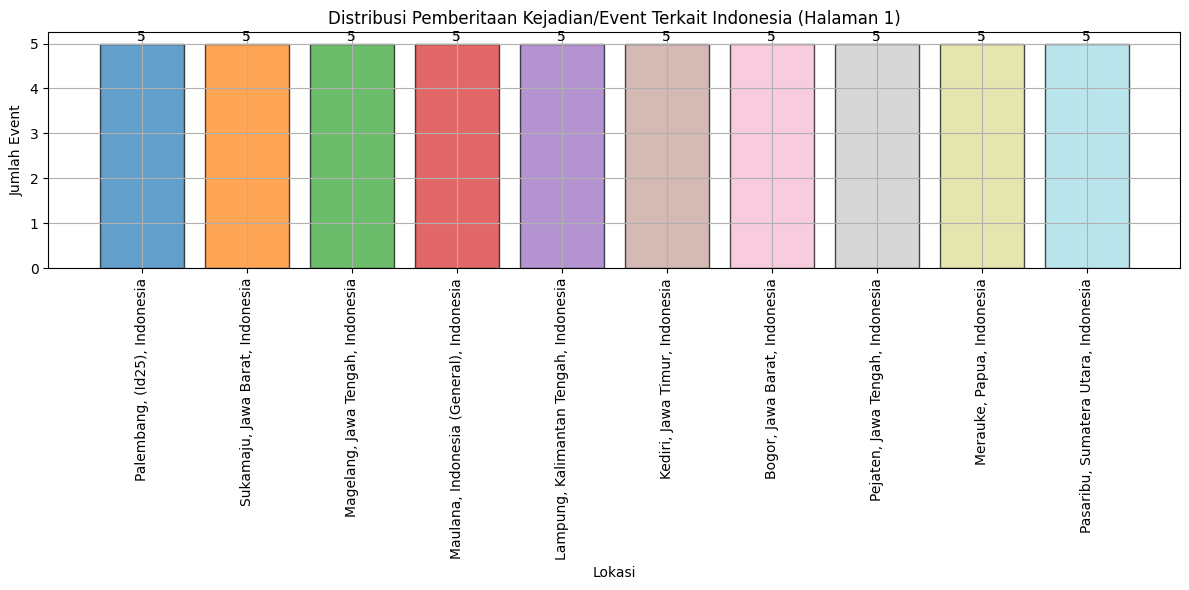

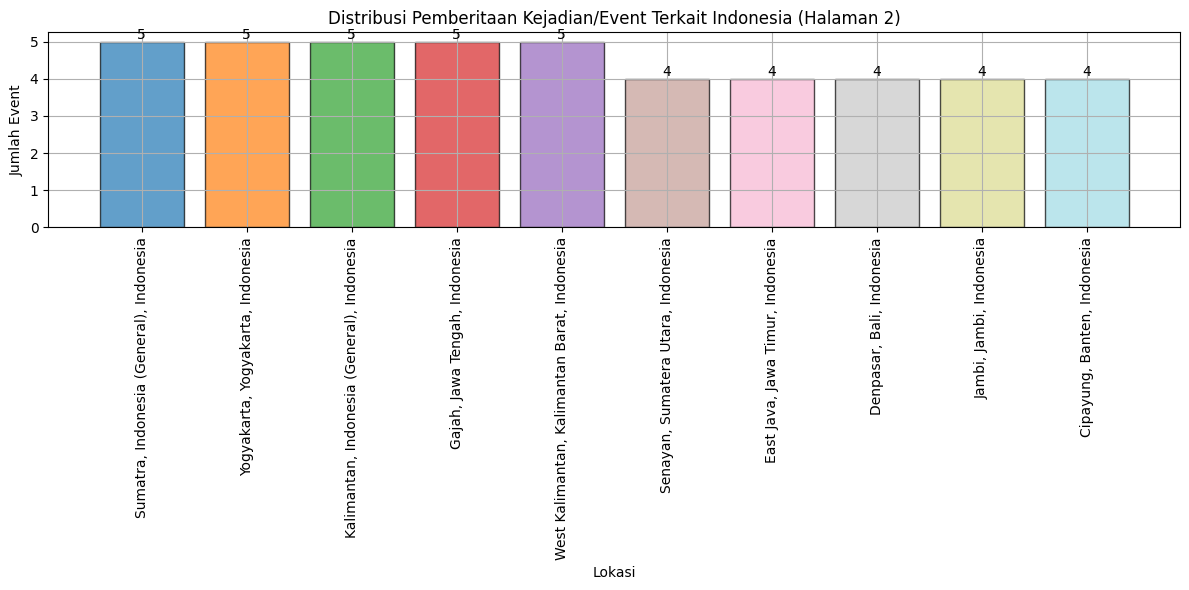

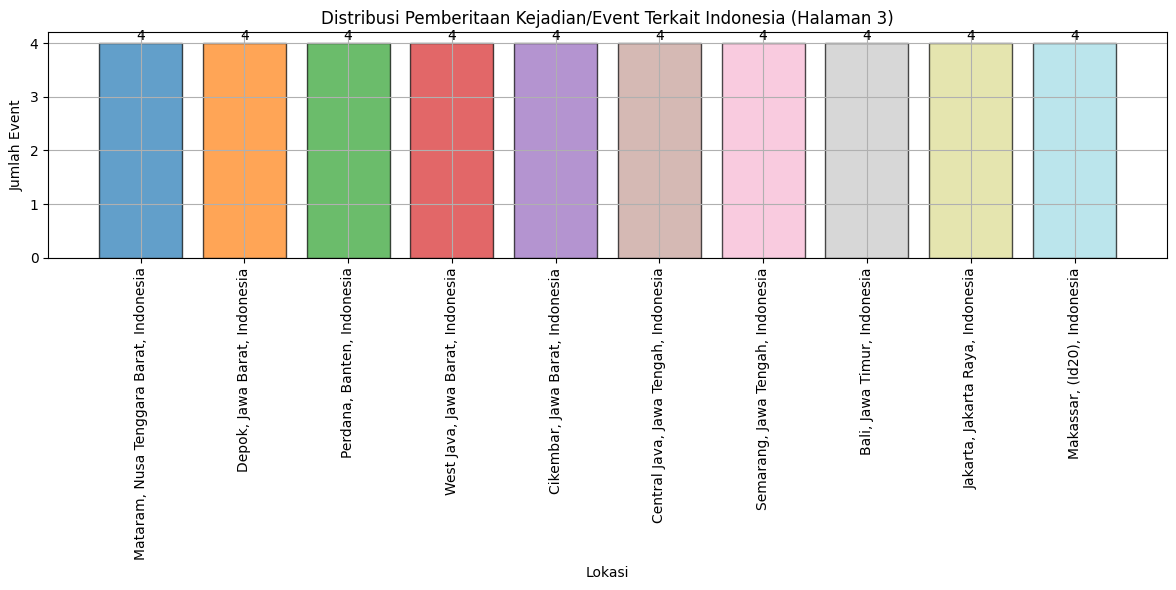

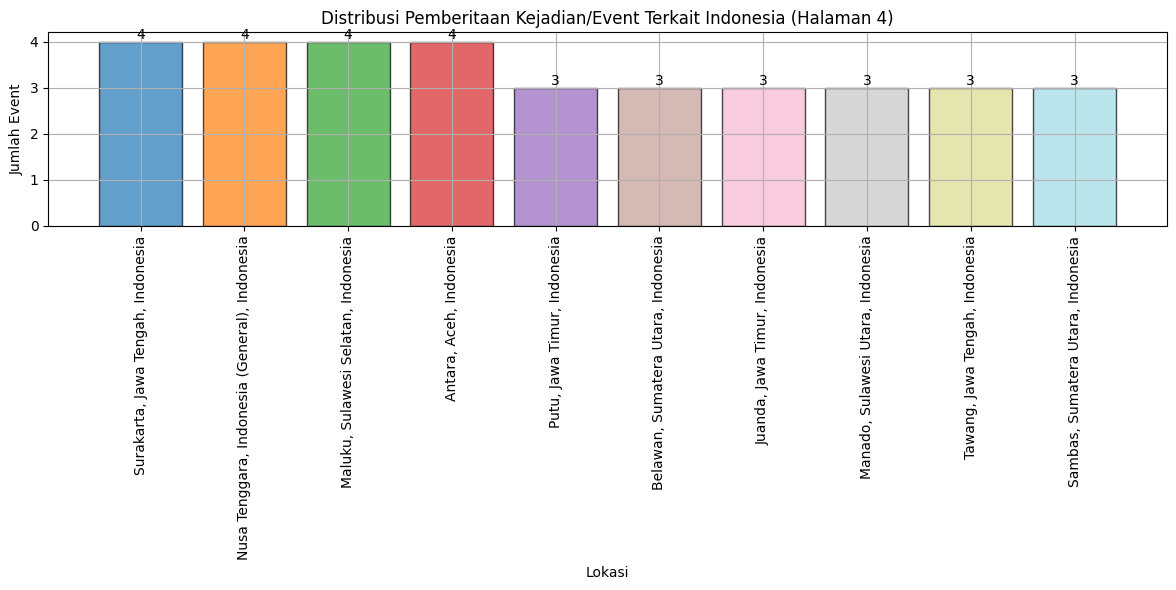

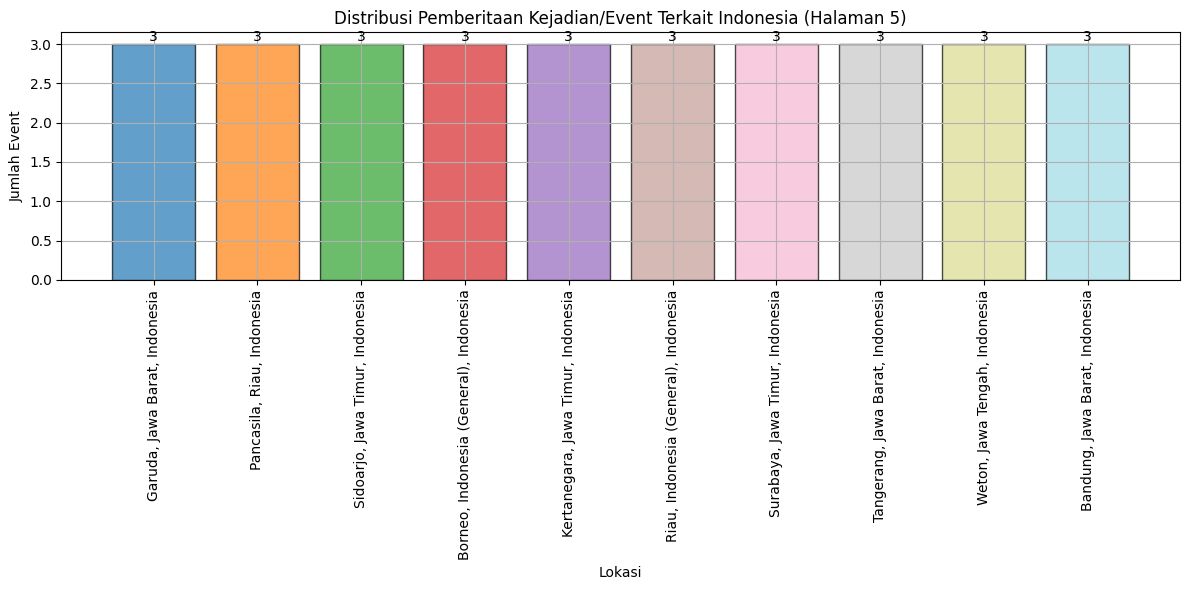

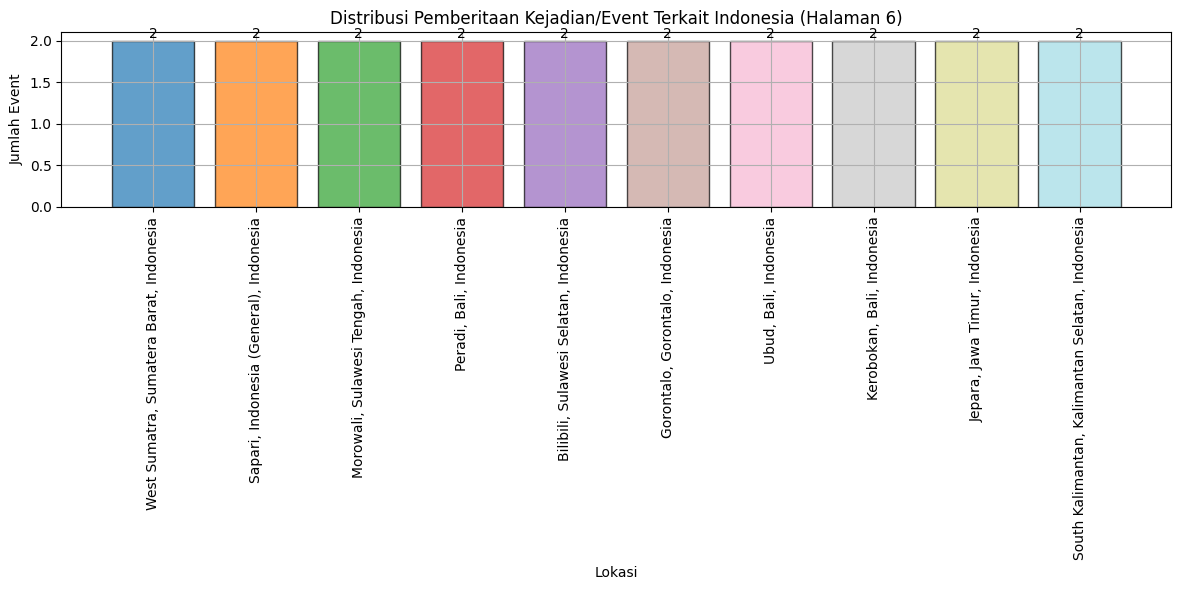

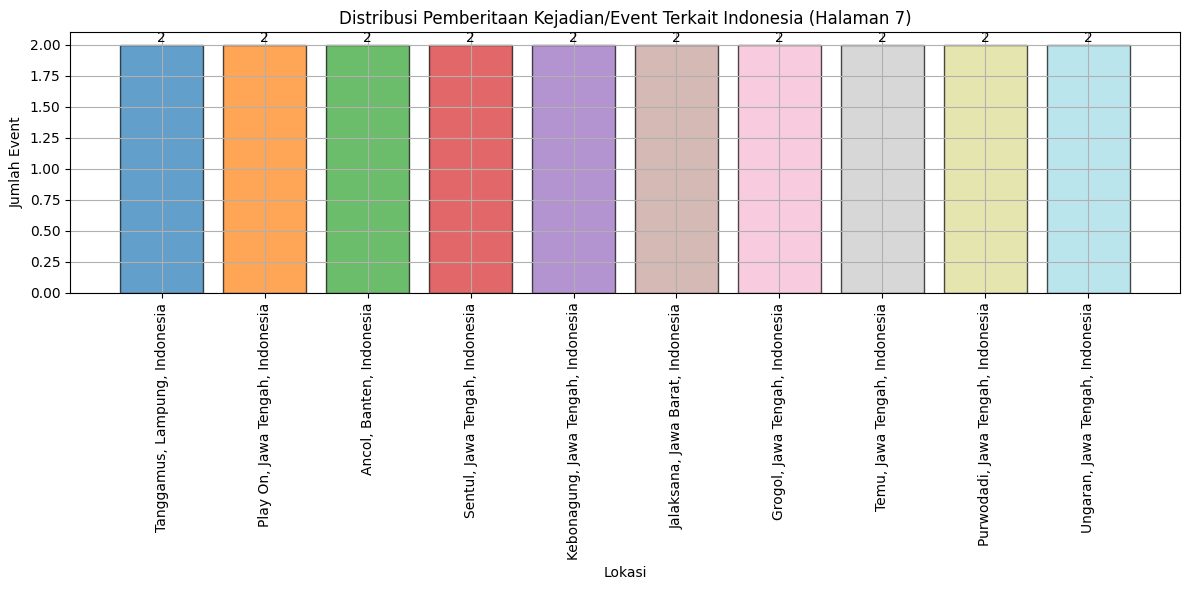

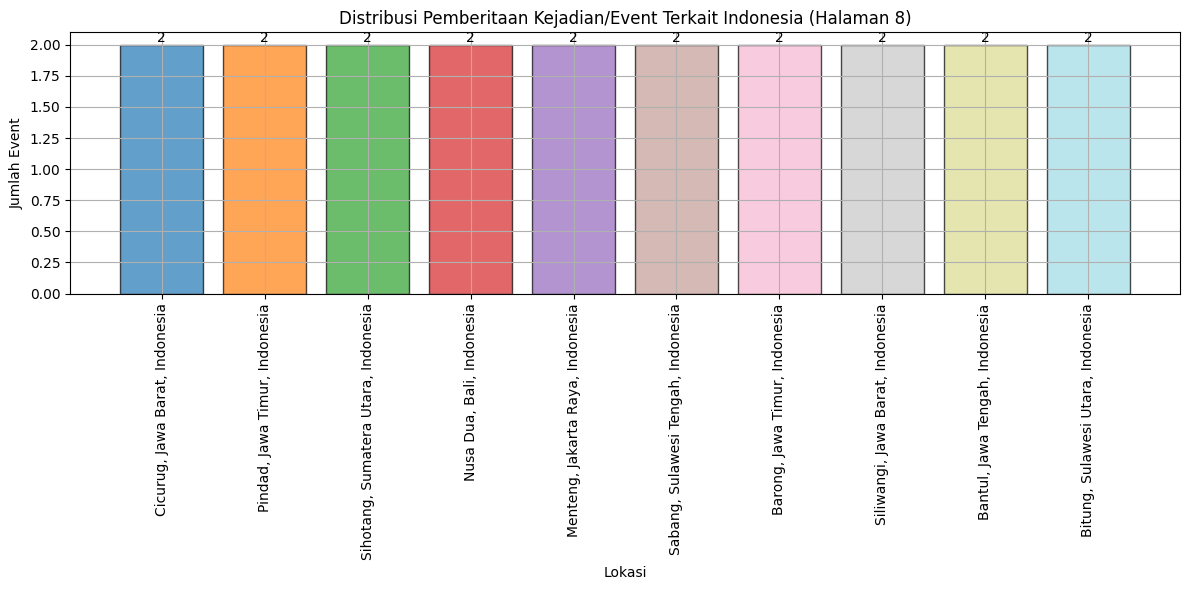

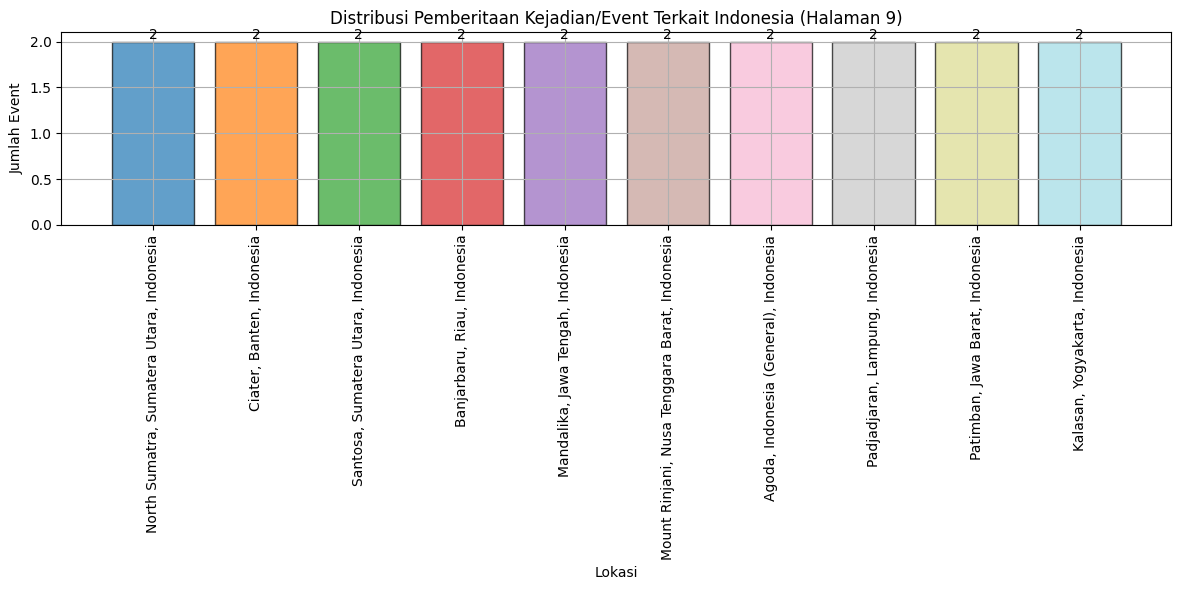

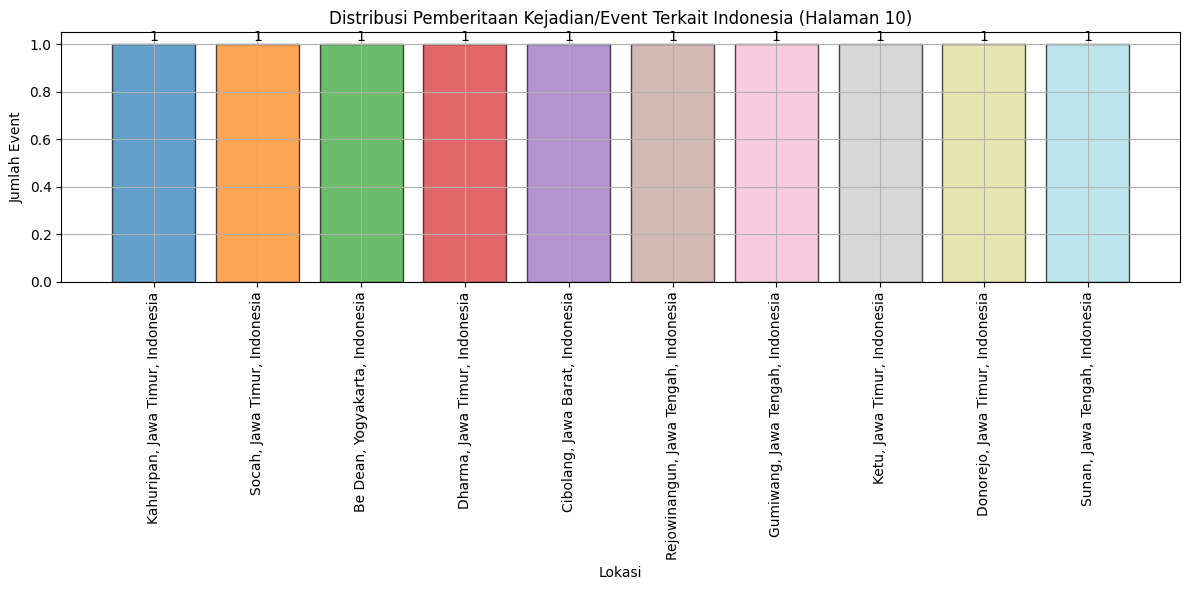

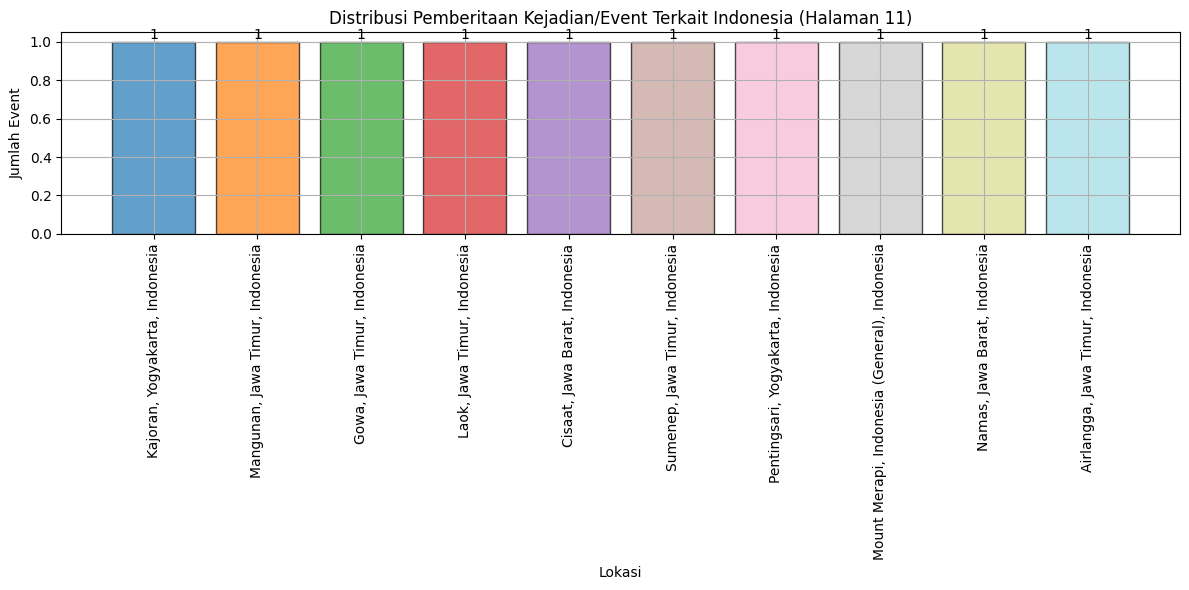

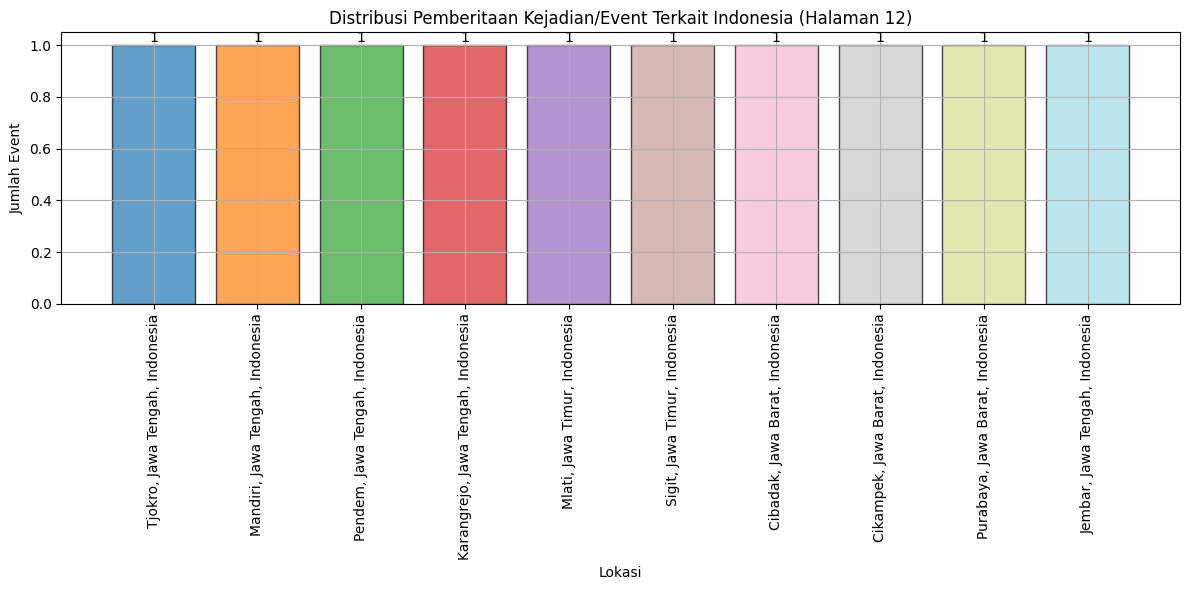

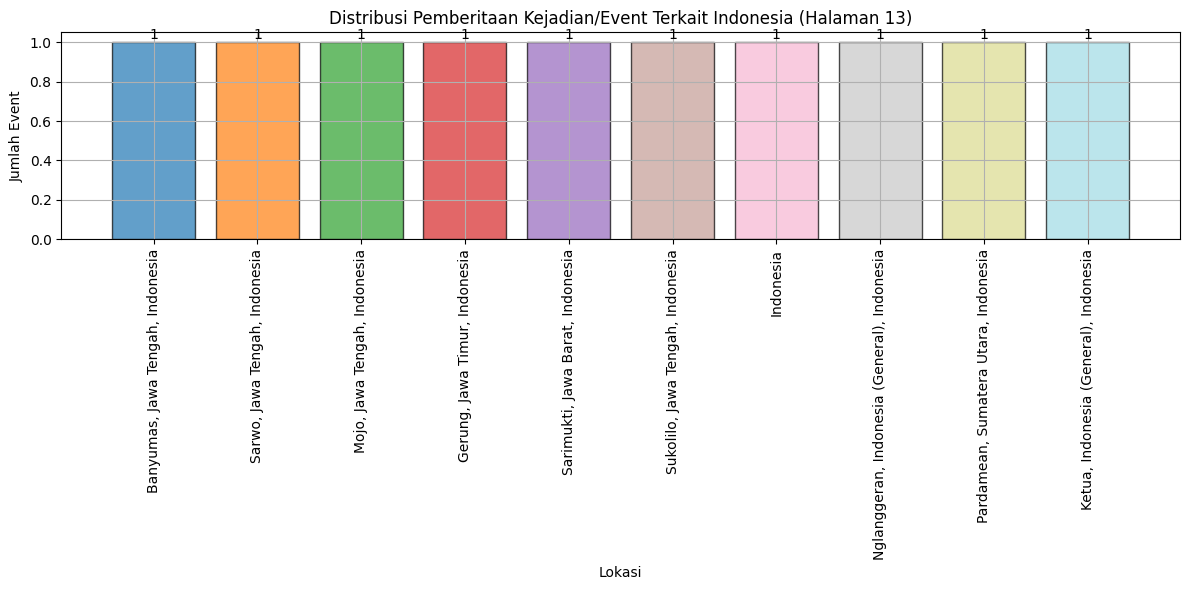

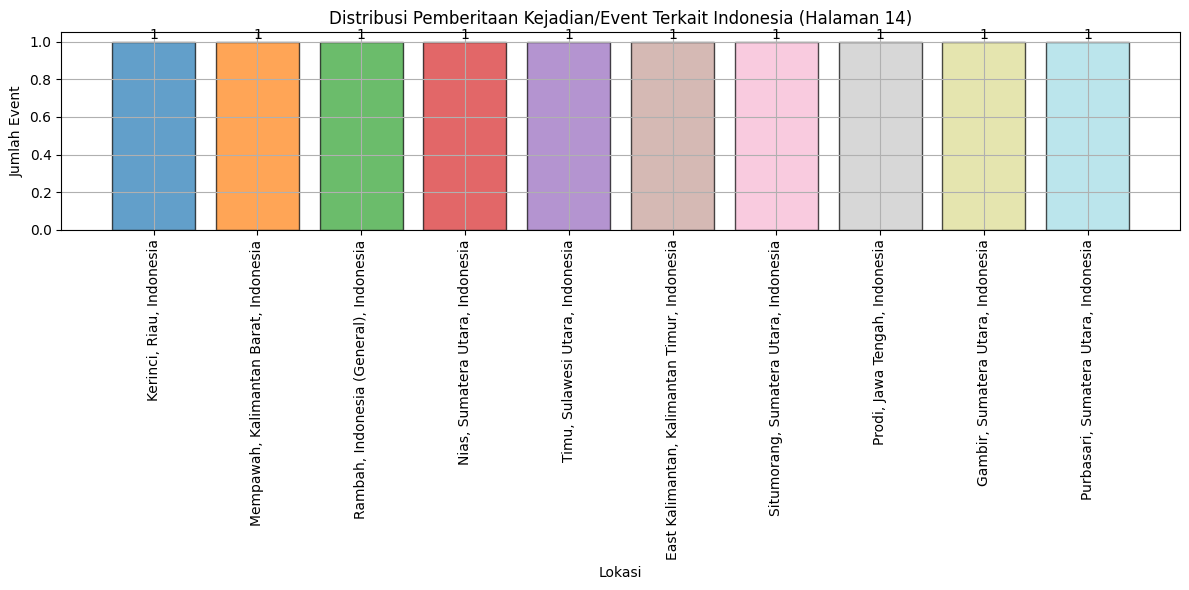

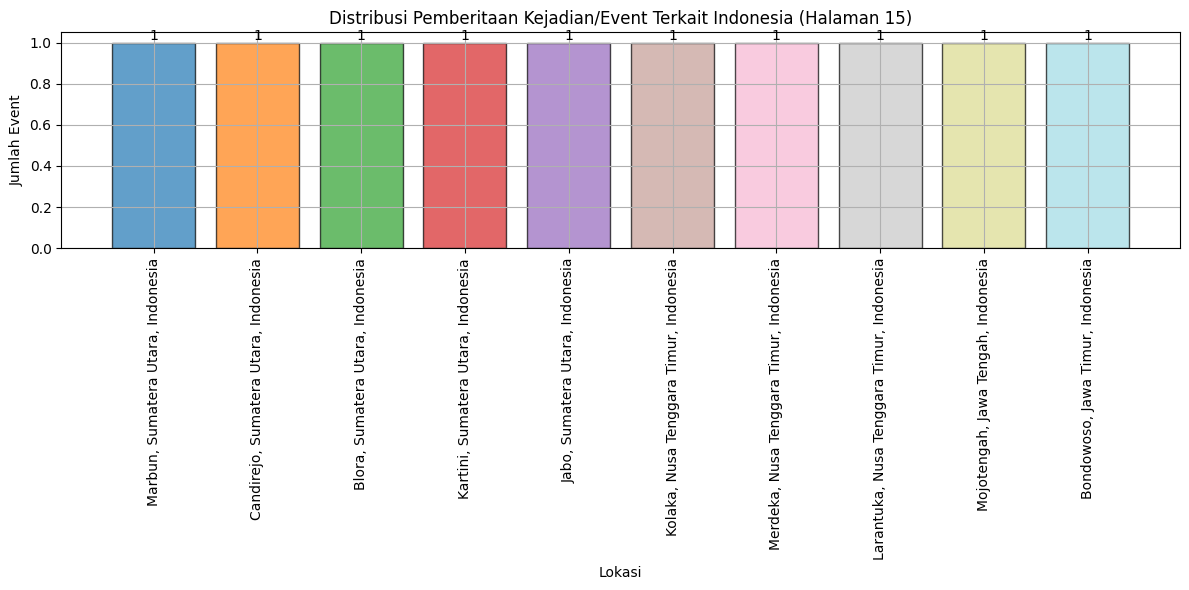

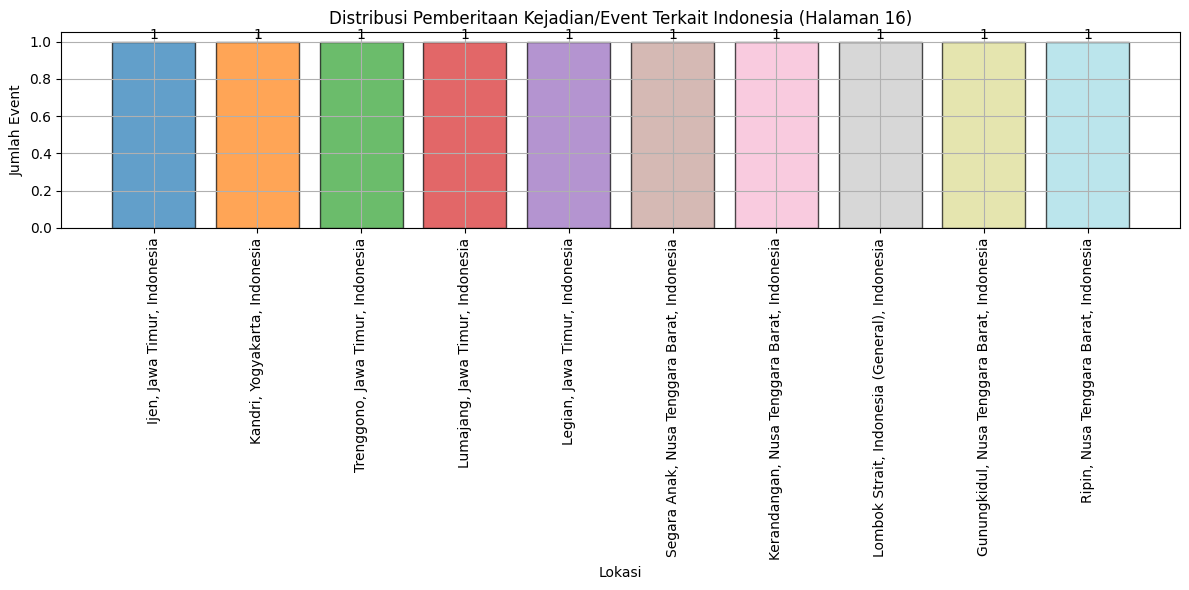

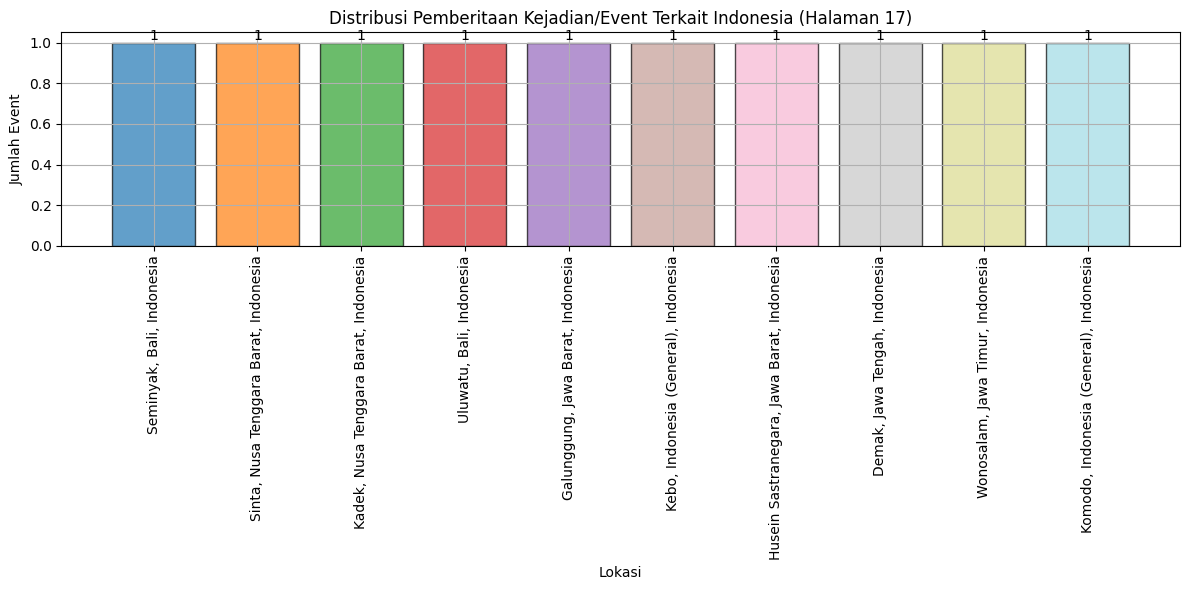

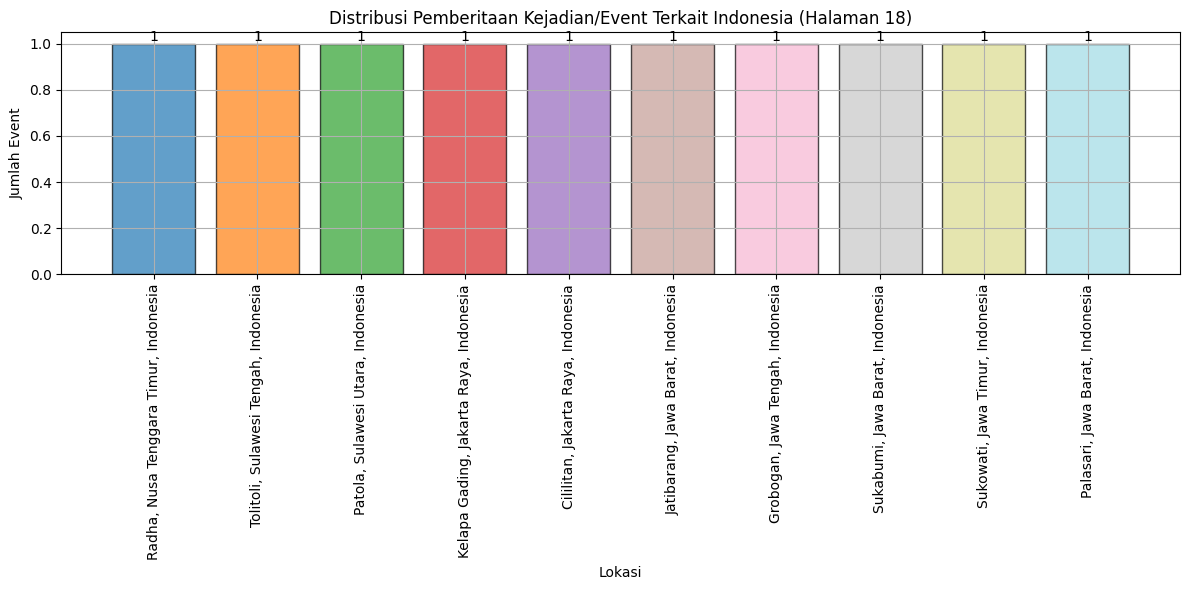

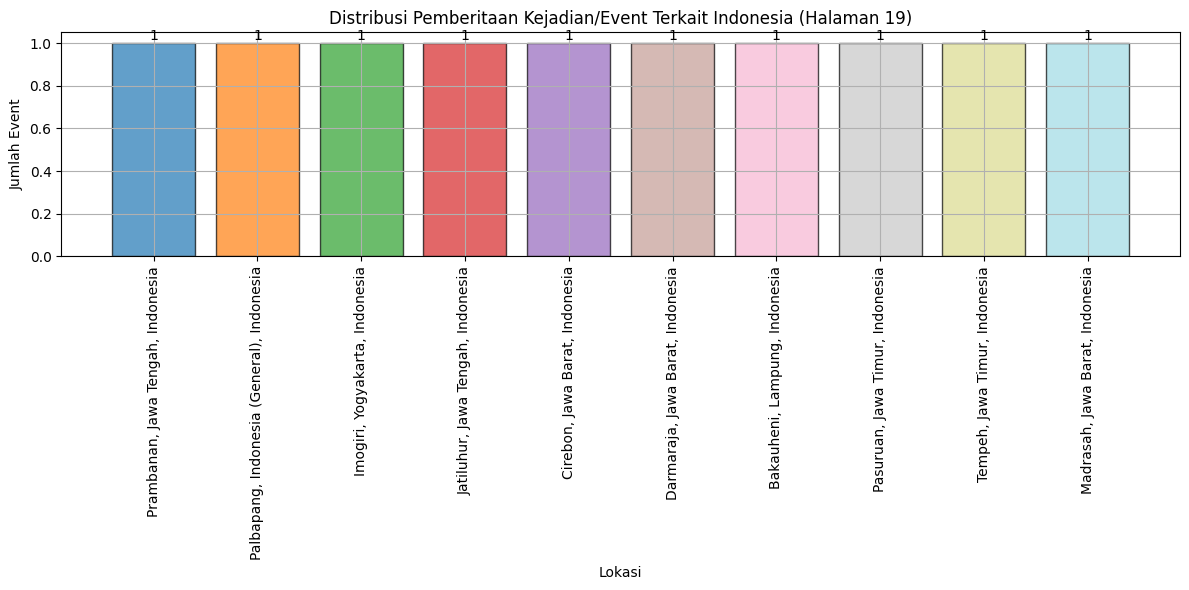

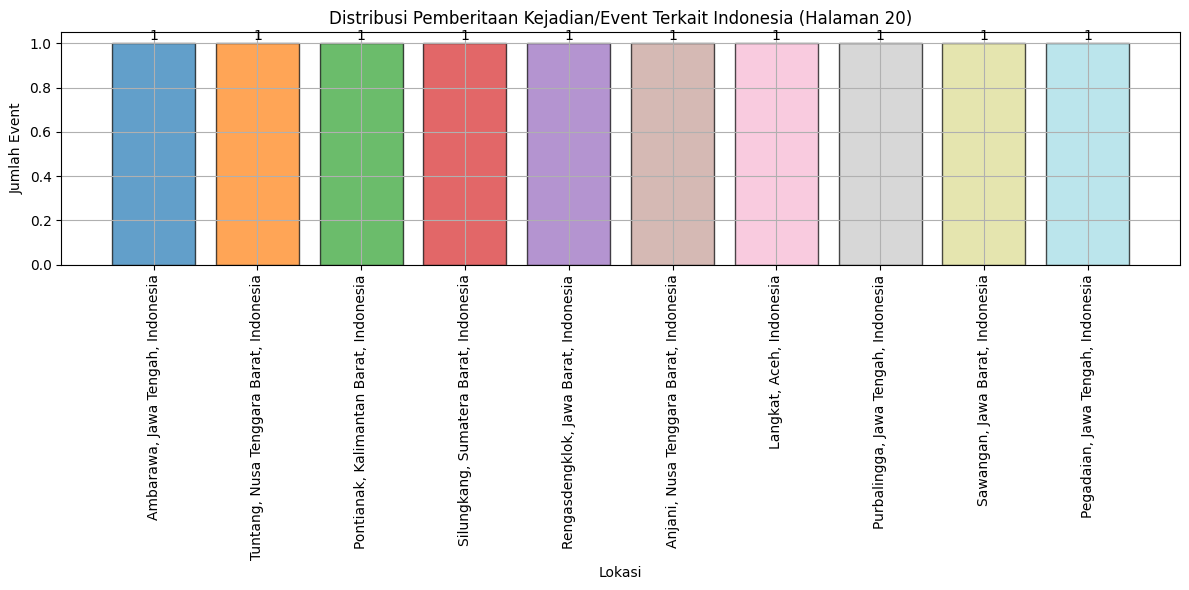

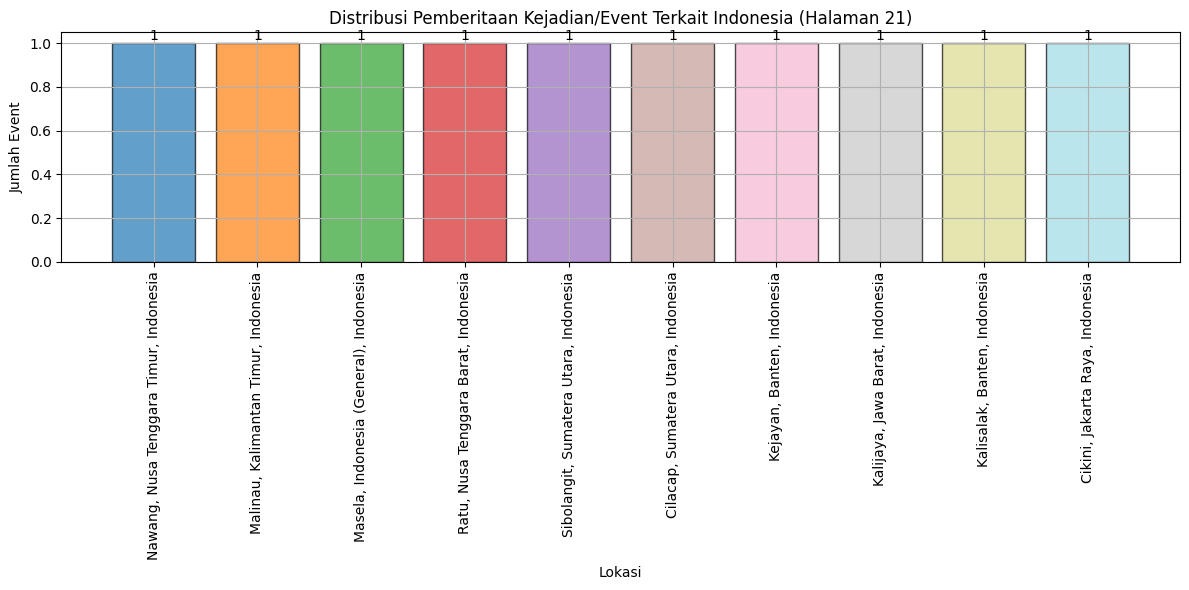

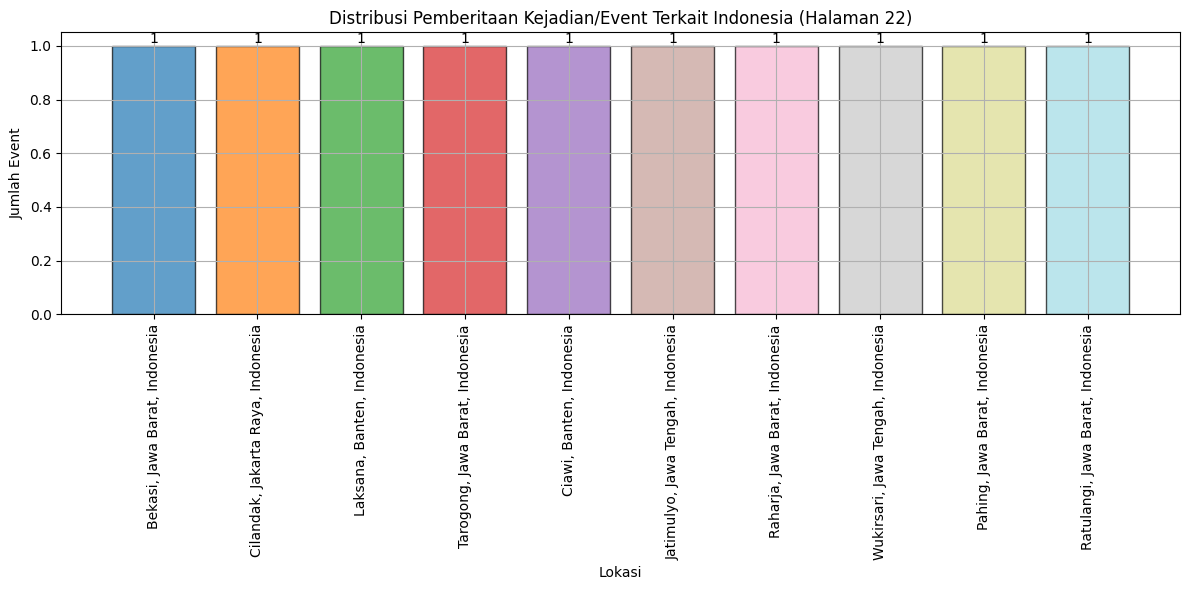

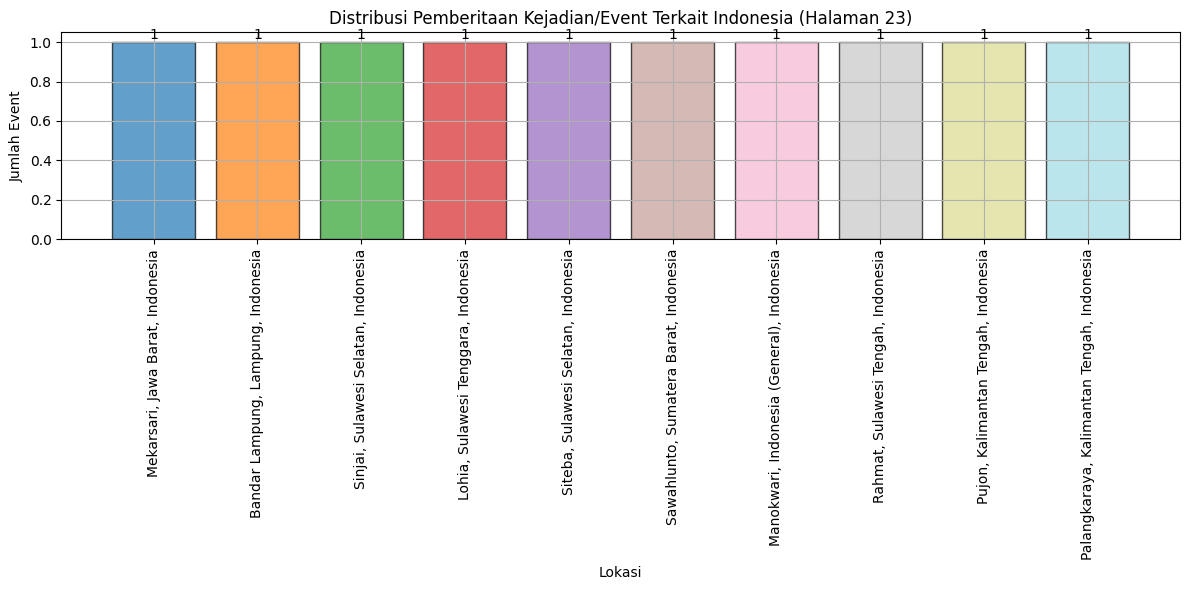

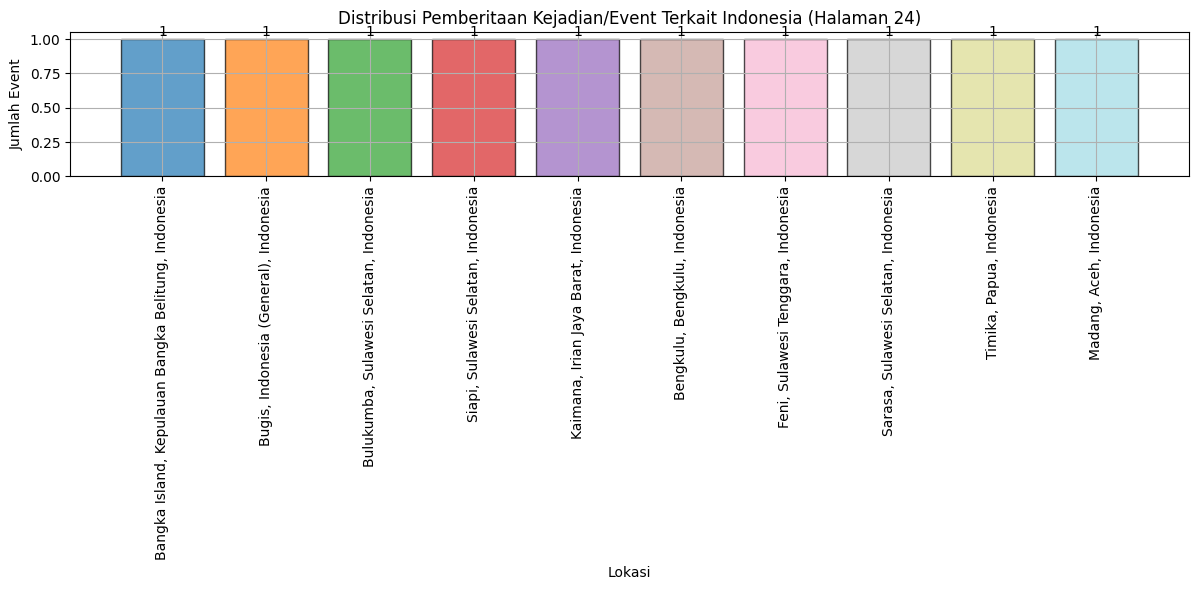

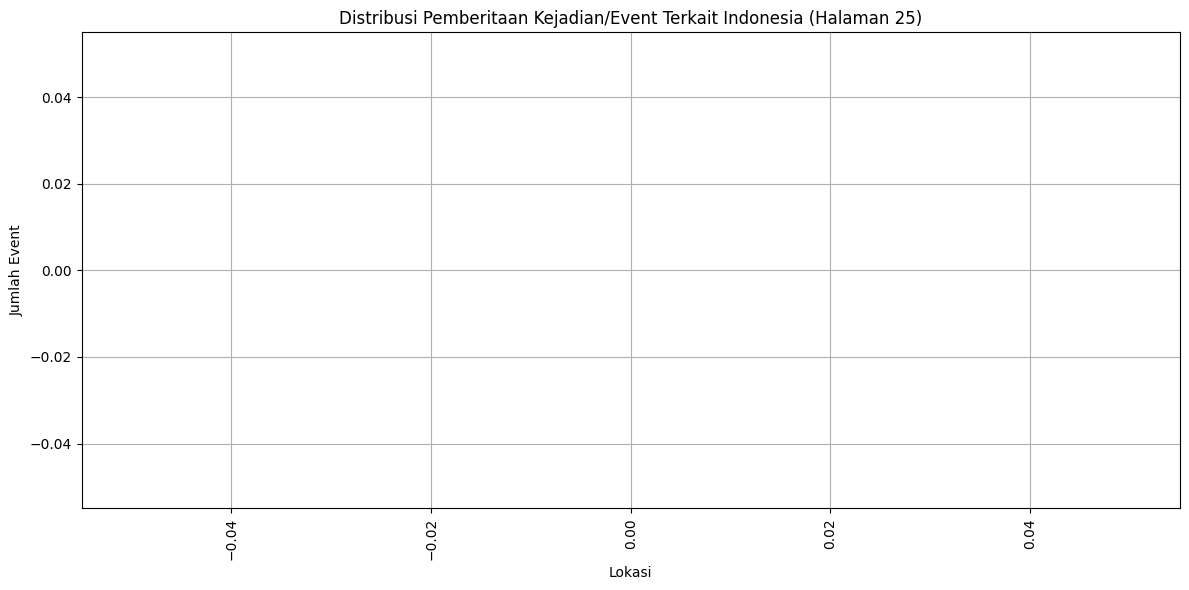

Location
Palembang, (Id25), Indonesia               5
Sukamaju, Jawa Barat, Indonesia            5
Magelang, Jawa Tengah, Indonesia           5
Maulana, Indonesia (General), Indonesia    5
Lampung, Kalimantan Tengah, Indonesia      5
Name: count, dtype: int64


In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Memfilter data yang hanya relevan dengan lokasi di Indonesia
filtered_df = df[df['Location'].str.contains('Indonesia', na=False)]

# Menampilkan distribusi lokasi berdasarkan jumlah event
location_counts = filtered_df['Location'].value_counts()

# Tentukan jumlah visualisasi per halaman (misalnya, 10 lokasi per halaman)
locations_per_page = 10
total_pages = len(location_counts) // locations_per_page + 1

# Membuat visualisasi untuk setiap halaman
for page in range(total_pages):
    start_idx = page * locations_per_page
    end_idx = start_idx + locations_per_page
    location_slice = location_counts[start_idx:end_idx]

    # Membuat subplot untuk setiap halaman
    plt.figure(figsize=(12, 6))
    bars = plt.bar(location_slice.index, location_slice.values,
                   color=plt.cm.tab20(np.linspace(0, 1, len(location_slice))),
                   edgecolor='black', alpha=0.7)

    # Menambahkan jumlah pada setiap batang
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

    # Pengaturan judul dan label
    plt.title(f'Distribusi Pemberitaan Kejadian/Event Terkait Indonesia (Halaman {page + 1})')
    plt.xlabel('Lokasi')
    plt.ylabel('Jumlah Event')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()  # Agar label tidak terpotong
    plt.show()

# Menampilkan beberapa lokasi yang memiliki banyak kejadian
print(location_counts.head())


# Filter event menarik

In [34]:
# Memfilter event berdasarkan kata kunci dalam judul event (misalnya, "Indonesia" atau kata kunci lain)
# Anda bisa menyesuaikan kata kunci sesuai dengan event yang menarik bagi Anda
event_interesting = df[df['Title'].str.contains('Indonesia', case=False, na=False)]

# Menampilkan beberapa baris dari event yang difilter untuk memastikan
print(event_interesting.head())



                           Location  LocationResultCount  Latitude  Longitude  \
2  Jakarta, Jakarta Raya, Indonesia                  904   -6.1744    106.829   
3  Jakarta, Jakarta Raya, Indonesia                  904   -6.1744    106.829   
4  Jakarta, Jakarta Raya, Indonesia                  904   -6.1744    106.829   
5                             Japan                  481   36.0000    138.000   
6                             Japan                  481   36.0000    138.000   

                                                 URL  \
2  https://www.cnnindonesia.com/olahraga/20241206...   
3  https://www.merdeka.com/sepakbola/bangga-momen...   
4  https://www.liputan6.com/tekno/read/5822357/to...   
5  https://www.merdeka.com/gaya/sering-dikira-bra...   
6       https://www.710wfnr.com/html/83f7299844.html   

                                            ImageURL  \
2  https://akcdn.detik.net.id/visual/2024/03/26/v...   
3  https://cdns.klimg.com/mav-prod-resized/0x0/or...   
4  https

In [35]:
# Melakukan analisis lebih lanjut, misalnya menghitung jumlah event yang ditemukan
print(f"Jumlah event yang mengandung kata 'Indonesia' dalam judul: {len(event_interesting)}")

Jumlah event yang mengandung kata 'Indonesia' dalam judul: 168


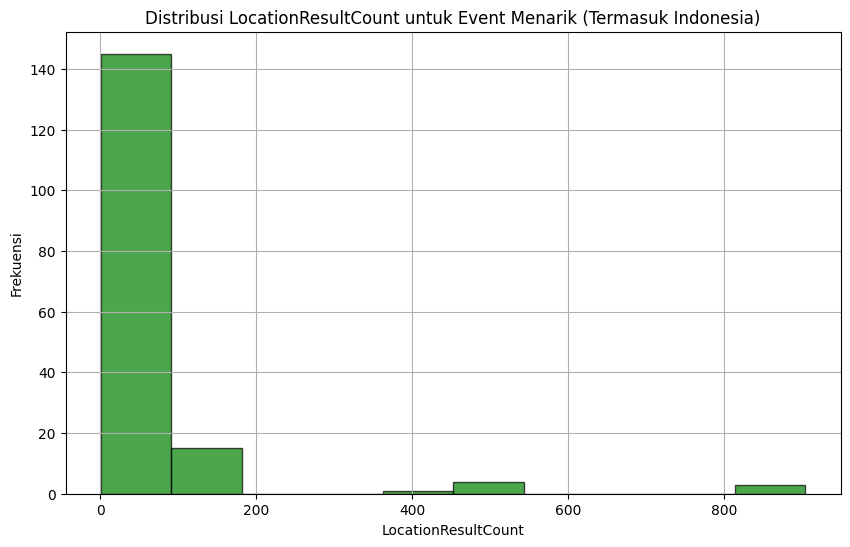

In [36]:
# Visualisasi distribusi LocationResultCount untuk event menarik
plt.figure(figsize=(10, 6))
plt.hist(event_interesting['LocationResultCount'], bins=10, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribusi LocationResultCount untuk Event Menarik (Termasuk Indonesia)')
plt.xlabel('LocationResultCount')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

In [41]:
# Memfilter data yang hanya mengandung 'Indonesia' di kolom 'Location'
filtered_df_indonesia = event_interesting[event_interesting['Location'].str.contains('Indonesia', case=False, na=False)]

# Menampilkan tabel lokasi dan jumlah event yang hanya berhubungan dengan Indonesia
location_counts_indonesia = filtered_df_indonesia['Location'].value_counts()

# Menampilkan beberapa lokasi di Indonesia beserta jumlah event yang terkait
print("Tabel Lokasi di Indonesia:")
location_table_indonesia = location_counts_indonesia.head(10).reset_index()
location_table_indonesia.columns = ['Location', 'Jumlah Event']
print(location_table_indonesia)


Tabel Lokasi di Indonesia:
                                       Location  Jumlah Event
0         Lampung, Kalimantan Tengah, Indonesia             4
1              Jakarta, Jakarta Raya, Indonesia             3
2                   Makassar, (Id20), Indonesia             3
3                   Bali, Jawa Timur, Indonesia             3
4           Maluku, Sulawesi Selatan, Indonesia             3
5              Tangerang, Jawa Barat, Indonesia             3
6             Surakarta, Jawa Tengah, Indonesia             3
7       Maulana, Indonesia (General), Indonesia             2
8  West Kalimantan, Kalimantan Barat, Indonesia             2
9             Yogyakarta, Yogyakarta, Indonesia             2


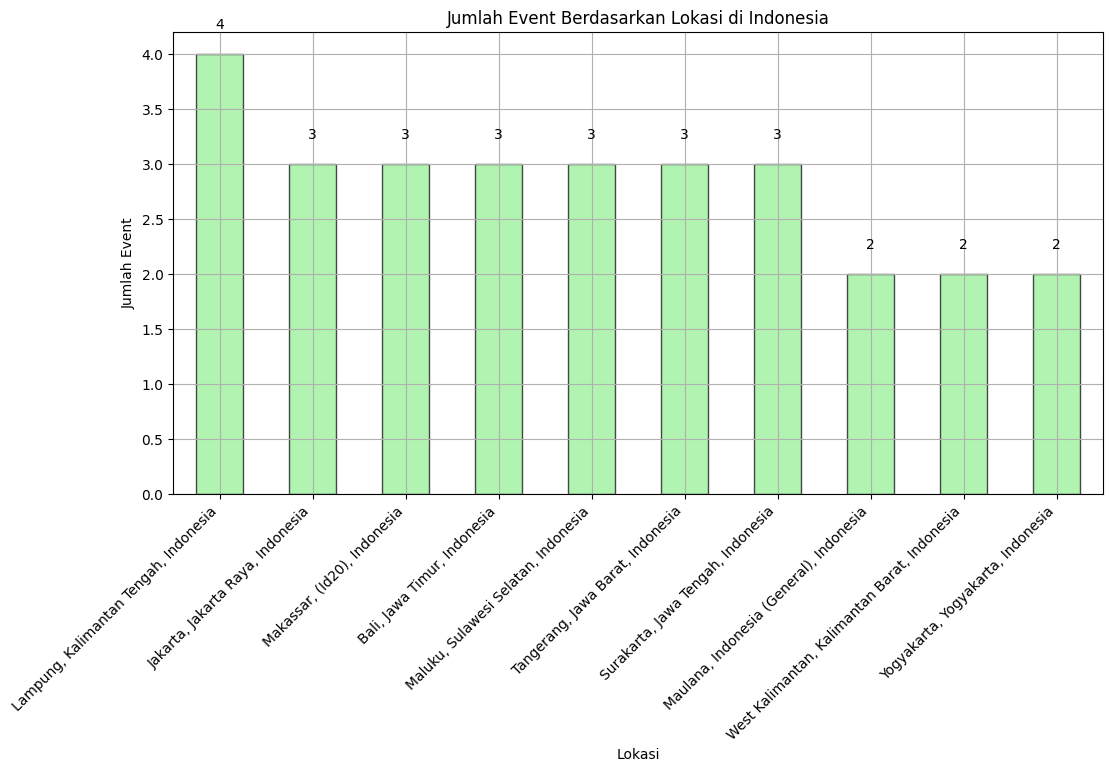

In [44]:
# Visualisasi diagram batang dari jumlah event per lokasi di Indonesia
plt.figure(figsize=(12, 6))

# Membuat bar chart
ax = location_counts_indonesia.head(10).plot(kind='bar', color='lightgreen', edgecolor='black', alpha=0.7)

# Menambahkan angka di atas setiap batang
for i, v in enumerate(location_counts_indonesia.head(10)):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10)  # Menampilkan angka di atas batang

# Memberikan judul dan label pada sumbu X dan Y
plt.title('Jumlah Event Berdasarkan Lokasi di Indonesia')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Event')

# Mengatur rotasi label di sumbu X agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Menampilkan grid
plt.grid(True)

# Menampilkan plot
plt.show()



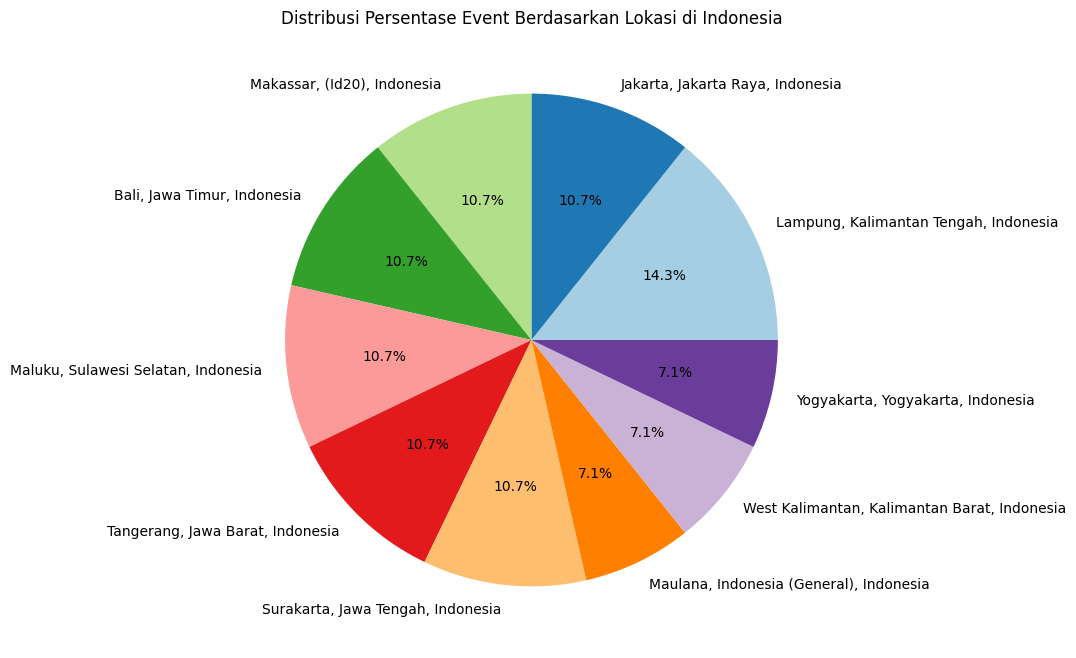

In [43]:
# Visualisasi diagram lingkaran untuk distribusi event berdasarkan lokasi di Indonesia
plt.figure(figsize=(8, 8))
location_counts_indonesia.head(10).plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, legend=False)
plt.title('Distribusi Persentase Event Berdasarkan Lokasi di Indonesia')
plt.ylabel('')  # Menghilangkan label di sisi Y
plt.show()


# Visualisasikan Event Secara Spatial Menggunakan Peta

In [47]:
# Import folium
import folium
import pandas as pd

# Memfilter data event yang relevan (Indonesia)
filtered_df_indonesia = df[df['Location'].str.contains('Indonesia', na=False)]

# Membuat peta dasar dengan koordinat pusat Indonesia
m = folium.Map(location=[-2.0, 118.0], zoom_start=5)

# Menambahkan marker untuk setiap event
for index, row in filtered_df_indonesia.iterrows():
    # Koordinat Latitude dan Longitude
    latitude = row['Latitude']
    longitude = row['Longitude']

    # Jika lokasi memiliki koordinat valid, tambahkan marker ke peta
    if pd.notnull(latitude) and pd.notnull(longitude):
        folium.Marker(
            location=[latitude, longitude],
            popup=f"<strong>Event: </strong>{row['Title']}<br><strong>URL: </strong><a href='{row['URL']}' target='_blank'>{row['URL']}</a>",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(m)

# Menyimpan peta ke dalam file HTML
m.save('/content/spatial_event_map.html')

# Menampilkan peta di notebook (Google Colab)
m


# Visualisasi jumlah event Berdasarkan kolom yg ada

In [48]:
# Memeriksa kolom yang ada dalam DataFrame
print(df.columns)


Index(['Location', 'LocationResultCount', 'Latitude', 'Longitude', 'URL',
       'ImageURL', 'Title'],
      dtype='object')


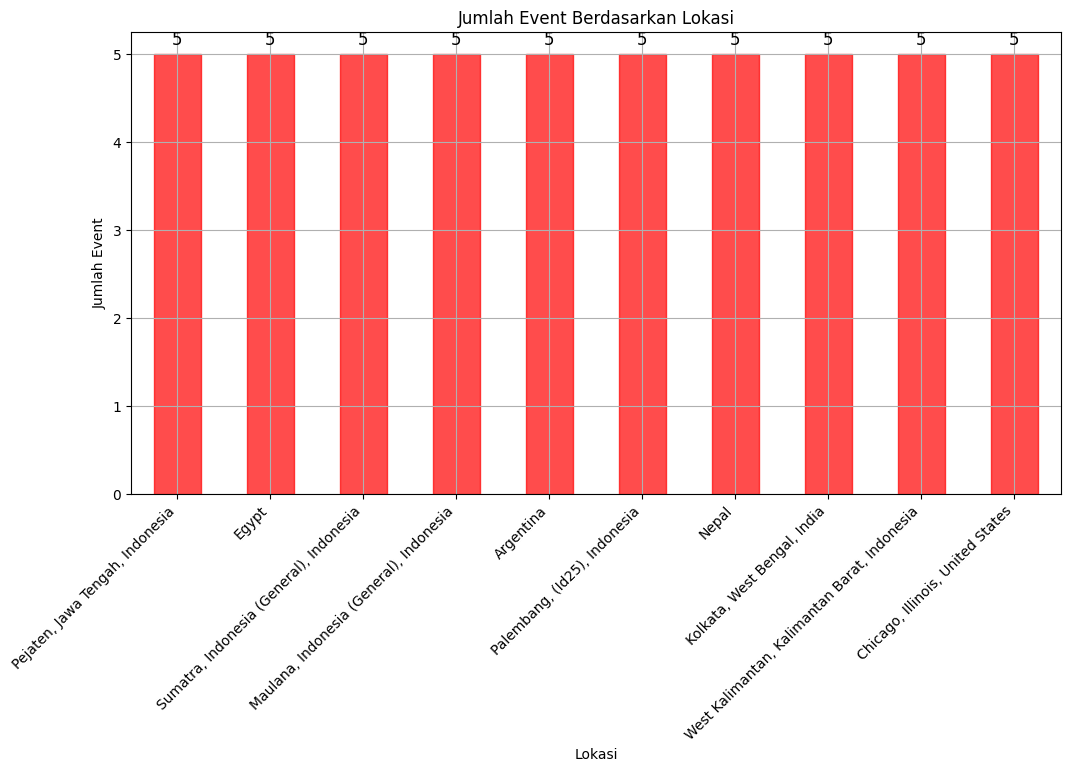

Location
Pejaten, Jawa Tengah, Indonesia            5
Egypt                                      5
Sumatra, Indonesia (General), Indonesia    5
Maulana, Indonesia (General), Indonesia    5
Argentina                                  5
Name: count, dtype: int64


In [51]:
import matplotlib.pyplot as plt

# Menghitung jumlah event berdasarkan lokasi
location_counts = df['Location'].value_counts()

# Visualisasi distribusi jumlah event berdasarkan lokasi
plt.figure(figsize=(12, 6))

# Plotkan diagram batang
ax = location_counts.head(10).plot(kind='bar', color='lightblue', edgecolor='black', alpha=0.7)

# Menambahkan keterangan angka pada batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Menandai batang terbesar dengan warna merah
max_value_bar = location_counts.head(10).idxmax()  # Menemukan lokasi dengan jumlah event terbesar
max_value_height = location_counts.head(10).max()
for p in ax.patches:
    if p.get_height() == max_value_height:
        p.set_color('red')  # Batang terbesar diberi warna merah

# Menambahkan detail judul dan label
plt.title('Jumlah Event Berdasarkan Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Event')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.show()

# Menampilkan beberapa lokasi dengan jumlah event terbanyak
print(location_counts.head())


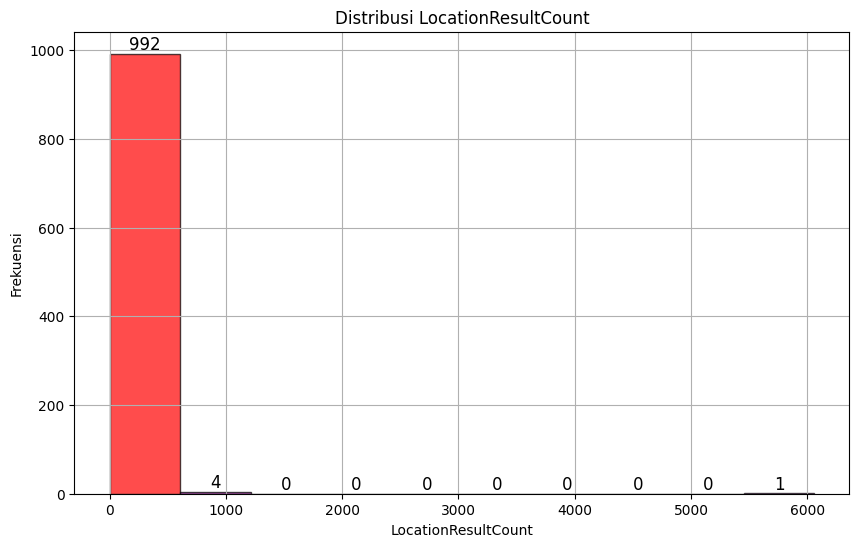

In [52]:
# Visualisasi distribusi LocationResultCount
plt.figure(figsize=(10, 6))

# Membuat histogram
ax = plt.hist(df['LocationResultCount'], bins=10, color='purple', edgecolor='black', alpha=0.7)

# Menambahkan keterangan angka pada setiap bar
for i in range(len(ax[0])):
    plt.text(ax[1][i] + (ax[1][i+1] - ax[1][i])/2, ax[0][i] + 0.2,
             f'{int(ax[0][i])}', ha='center', va='bottom', fontsize=12)

# Menandai batang terbesar dengan warna merah
max_value = max(ax[0])  # Mencari frekuensi terbesar
for rect in ax[2]:
    if rect.get_height() == max_value:
        rect.set_facecolor('red')  # Warna merah pada batang terbesar

# Menambahkan judul dan label
plt.title('Distribusi LocationResultCount')
plt.xlabel('LocationResultCount')
plt.ylabel('Frekuensi')
plt.grid(True)

plt.show()


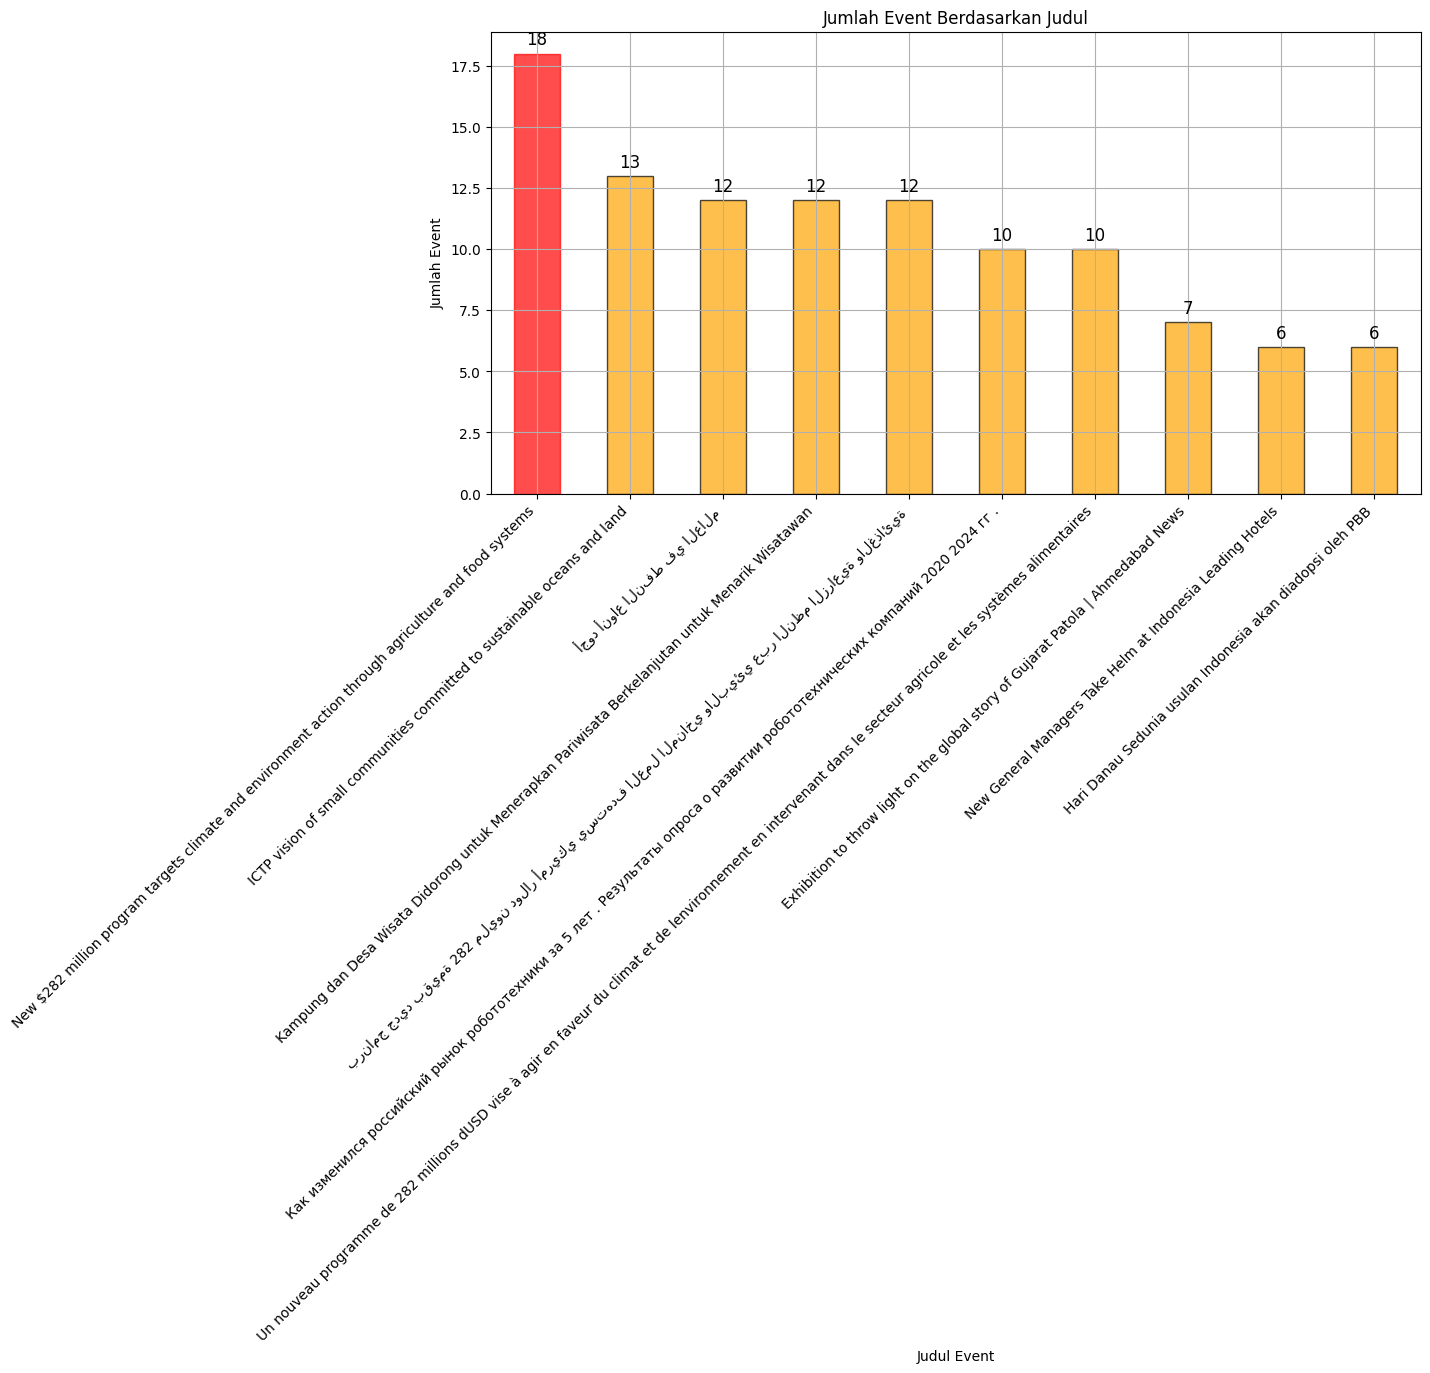

Title
New $282 million program targets climate and environment action through agriculture and food systems    18
ICTP vision of small communities committed to sustainable oceans and land                               13
أجود أنواع النفط في العالم                                                                              12
Kampung dan Desa Wisata Didorong untuk Menerapkan Pariwisata Berkelanjutan untuk Menarik Wisatawan      12
برنامج جديد بقيمة 282 مليون دولار أمريكي يستهدف العمل المناخي والبيئي عبر النظم الزراعية والغذائية      12
Name: count, dtype: int64


In [53]:
# Menghitung jumlah event berdasarkan judul
title_counts = df['Title'].value_counts()

# Visualisasi jumlah event berdasarkan judul
plt.figure(figsize=(12, 6))

# Plotkan diagram batang
ax = title_counts.head(10).plot(kind='bar', color='orange', edgecolor='black', alpha=0.7)

# Menambahkan keterangan angka pada batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Menandai batang terbesar dengan warna merah
max_value_bar = title_counts.head(10).idxmax()  # Menemukan judul dengan jumlah event terbesar
max_value_height = title_counts.head(10).max()
for p in ax.patches:
    if p.get_height() == max_value_height:
        p.set_color('red')  # Batang terbesar diberi warna merah

# Menambahkan detail judul dan label
plt.title('Jumlah Event Berdasarkan Judul')
plt.xlabel('Judul Event')
plt.ylabel('Jumlah Event')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.show()

# Menampilkan beberapa judul dengan jumlah event terbanyak
print(title_counts.head())


# Analisis sentimen judul

In [57]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi untuk mendapatkan sentimen dari teks
def get_sentiment(text):
    analysis = TextBlob(text)
    # Sentiment polarity value
    return analysis.sentiment.polarity

# Mengaplikasikan fungsi get_sentiment pada kolom 'Title'
df['Sentiment'] = df['Title'].apply(get_sentiment)

# Menentukan sentimen (positif, negatif, netral)
def categorize_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

df['Sentiment_Label'] = df['Sentiment'].apply(categorize_sentiment)

# Menampilkan beberapa baris untuk memastikan hasil
print(df[['Title', 'Sentiment', 'Sentiment_Label']].head())


                                               Title  Sentiment  \
0  Onad Lawan Bobby Saputra di Superstar Knock Ou...       -0.4   
1                           印尼经济最新资讯 _ 印尼经济最新动态 _ 印尼        0.0   
2  Tiket Vietnam vs Indonesia di Piala AFF 2024 S...        0.0   
3  Bangga ! Momen Skuad Timnas Indonesia Putri Ti...        0.0   
4  Top 3 Tekno : Ini Dampak iPhone 16 Masih Ilega...        0.5   

  Sentiment_Label  
0         Negatif  
1          Netral  
2          Netral  
3          Netral  
4         Positif  


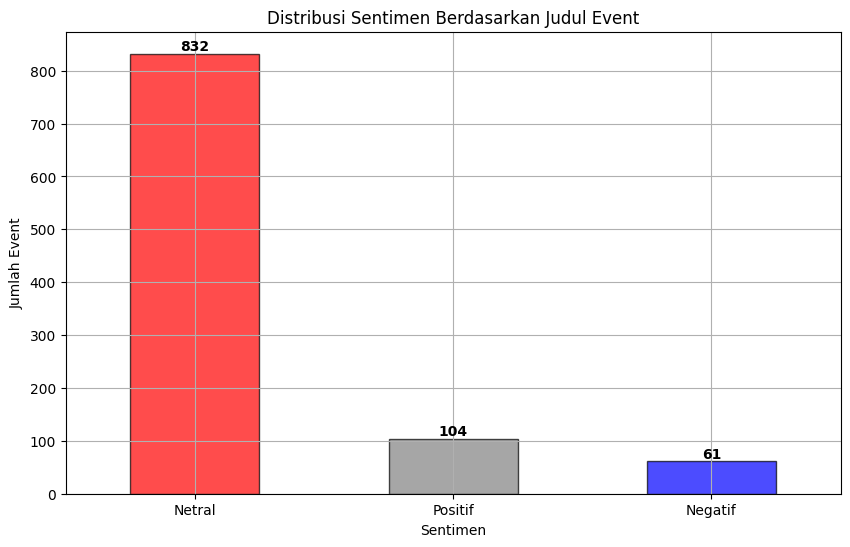

Sentiment_Label
Netral     832
Positif    104
Negatif     61
Name: count, dtype: int64


In [63]:
# Menentukan warna berdasarkan jumlah
sentiment_counts = df['Sentiment_Label'].value_counts()

# Warna batang berdasarkan jumlah (terbesar merah, terkecil biru)
colors = ['red' if x == sentiment_counts.max() else 'blue' if x == sentiment_counts.min() else 'gray' for x in sentiment_counts]

# Membuat visualisasi
plt.figure(figsize=(10, 6))
ax = sentiment_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.7)

# Menambahkan nilai pada setiap batang
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

# Menambahkan judul dan label
plt.title('Distribusi Sentimen Berdasarkan Judul Event')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Event')

# Menampilkan grid dan rotasi label x
plt.xticks(rotation=0)
plt.grid(True)

# Menampilkan plot
plt.show()

# Menampilkan jumlah event per sentimen
print(sentiment_counts)

In [59]:
# Menampilkan jumlah event berdasarkan sentimen
print(df['Sentiment_Label'].value_counts())

Sentiment_Label
Netral     832
Positif    104
Negatif     61
Name: count, dtype: int64


In [60]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi analisis sentimen VADER
analyzer = SentimentIntensityAnalyzer()

# Fungsi untuk mendapatkan sentimen menggunakan VADER
def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']  # 'compound' adalah nilai keseluruhan

# Mengaplikasikan fungsi get_vader_sentiment pada kolom 'Title'
df['Sentiment_VADER'] = df['Title'].apply(get_vader_sentiment)

# Menentukan sentimen (positif, negatif, netral)
def categorize_vader_sentiment(score):
    if score > 0.05:
        return 'Positif'
    elif score < -0.05:
        return 'Negatif'
    else:
        return 'Netral'

df['Sentiment_VADER_Label'] = df['Sentiment_VADER'].apply(categorize_vader_sentiment)

# Menampilkan beberapa baris untuk memastikan hasil
print(df[['Title', 'Sentiment_VADER', 'Sentiment_VADER_Label']].head())


                                               Title  Sentiment_VADER  \
0  Onad Lawan Bobby Saputra di Superstar Knock Ou...          -0.1027   
1                           印尼经济最新资讯 _ 印尼经济最新动态 _ 印尼           0.0000   
2  Tiket Vietnam vs Indonesia di Piala AFF 2024 S...           0.0000   
3  Bangga ! Momen Skuad Timnas Indonesia Putri Ti...           0.0000   
4  Top 3 Tekno : Ini Dampak iPhone 16 Masih Ilega...           0.2023   

  Sentiment_VADER_Label  
0               Negatif  
1                Netral  
2                Netral  
3                Netral  
4               Positif  


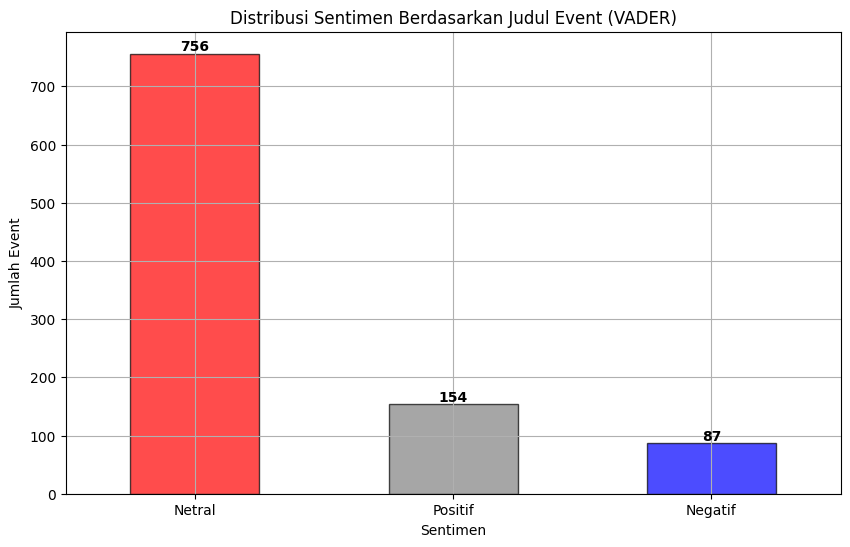

Sentiment_VADER_Label
Netral     756
Positif    154
Negatif     87
Name: count, dtype: int64


In [64]:
# Menghitung distribusi sentimen berdasarkan VADER
vader_sentiment_counts = df['Sentiment_VADER_Label'].value_counts()

# Menentukan warna batang berdasarkan jumlah (terbesar merah, terkecil biru)
colors = ['red' if x == vader_sentiment_counts.max() else 'blue' if x == vader_sentiment_counts.min() else 'gray' for x in vader_sentiment_counts]

# Membuat visualisasi
plt.figure(figsize=(10, 6))
ax = vader_sentiment_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.7)

# Menambahkan nilai pada setiap batang
for i, v in enumerate(vader_sentiment_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

# Menambahkan judul dan label
plt.title('Distribusi Sentimen Berdasarkan Judul Event (VADER)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Event')

# Menampilkan grid dan rotasi label x
plt.xticks(rotation=0)
plt.grid(True)

# Menampilkan plot
plt.show()

# Menampilkan jumlah event per sentimen berdasarkan VADER
print(vader_sentiment_counts)


In [62]:
# Menampilkan jumlah event berdasarkan sentimen
print(df['Sentiment_VADER_Label'].value_counts())


Sentiment_VADER_Label
Netral     756
Positif    154
Negatif     87
Name: count, dtype: int64


# Top 10 "INDONESIA"

In [67]:
# 1. Top 10 Judul Event
top_10_titles = df['Title'].value_counts().head(10).reset_index()
top_10_titles.columns = ['Judul Event', 'Jumlah Event']
top_10_titles.insert(0, 'No', range(1, 1 + len(top_10_titles)))

# Tampilkan tabel
print("Top 10 Judul Event:")
display(top_10_titles)

Top 10 Judul Event:


No                                        Judul Event  Jumlah Event
0   1  New $282 million program targets climate and e...            18
1   2  ICTP vision of small communities committed to ...            13
2   3                         أجود أنواع النفط في العالم            12
3   4  Kampung dan Desa Wisata Didorong untuk Menerap...            12
4   5  برنامج جديد بقيمة 282 مليون دولار أمريكي يستهد...            12
5   6  Как изменился российский рынок робототехники з...            10
6   7  Un nouveau programme de 282 millions dUSD vise...            10
7   8  Exhibition to throw light on the global story ...             7
8   9  New General Managers Take Helm at Indonesia Le...             6
9  10  Hari Danau Sedunia usulan Indonesia akan diado...             6

In [68]:
# 2. Top 10 URL Event
top_10_urls = df['URL'].value_counts().head(10).reset_index()
top_10_urls.columns = ['URL Event', 'Jumlah Event']
top_10_urls.insert(0, 'No', range(1, 1 + len(top_10_urls)))

# Tampilkan tabel
print("Top 10 URL Event:")
display(top_10_urls)

Top 10 URL Event:


No                                          URL Event  Jumlah Event
0   1  https://www.fao.org/newsroom/detail/new--282-m...            18
1   2  https://eturbonews.com/ictp-vision-small-commu...            13
2   3  https://jogjapolitan.harianjogja.com/read/2024...            12
3   4  https://www.fao.org/newsroom/detail/new--282-m...            12
4   5                   https://www.aiwaegypt.com/123431            12
5   6  https://www.comnews.ru/content/236716/2024-12-...            10
6   7  https://www.fao.org/newsroom/detail/new--282-m...            10
7   8  https://indianexpress.com/article/cities/ahmed...             7
8   9  https://pressrelease.kontan.co.id/news/seni-ja...             6
9  10  https://www.nowjakarta.co.id/new-general-manag...             6

In [69]:
# 3. Top 10 Lokasi Event
top_10_locations = df['Location'].value_counts().head(10).reset_index()
top_10_locations.columns = ['Lokasi Event', 'Jumlah Event']
top_10_locations.insert(0, 'No', range(1, 1 + len(top_10_locations)))

# Tampilkan tabel
print("Top 10 Lokasi Event:")
display(top_10_locations)

Top 10 Lokasi Event:


No                                  Lokasi Event  Jumlah Event
0   1               Pejaten, Jawa Tengah, Indonesia             5
1   2                                         Egypt             5
2   3       Sumatra, Indonesia (General), Indonesia             5
3   4       Maulana, Indonesia (General), Indonesia             5
4   5                                     Argentina             5
5   6                  Palembang, (Id25), Indonesia             5
6   7                                         Nepal             5
7   8                   Kolkata, West Bengal, India             5
8   9  West Kalimantan, Kalimantan Barat, Indonesia             5
9  10              Chicago, Illinois, United States             5

# INSIGHT

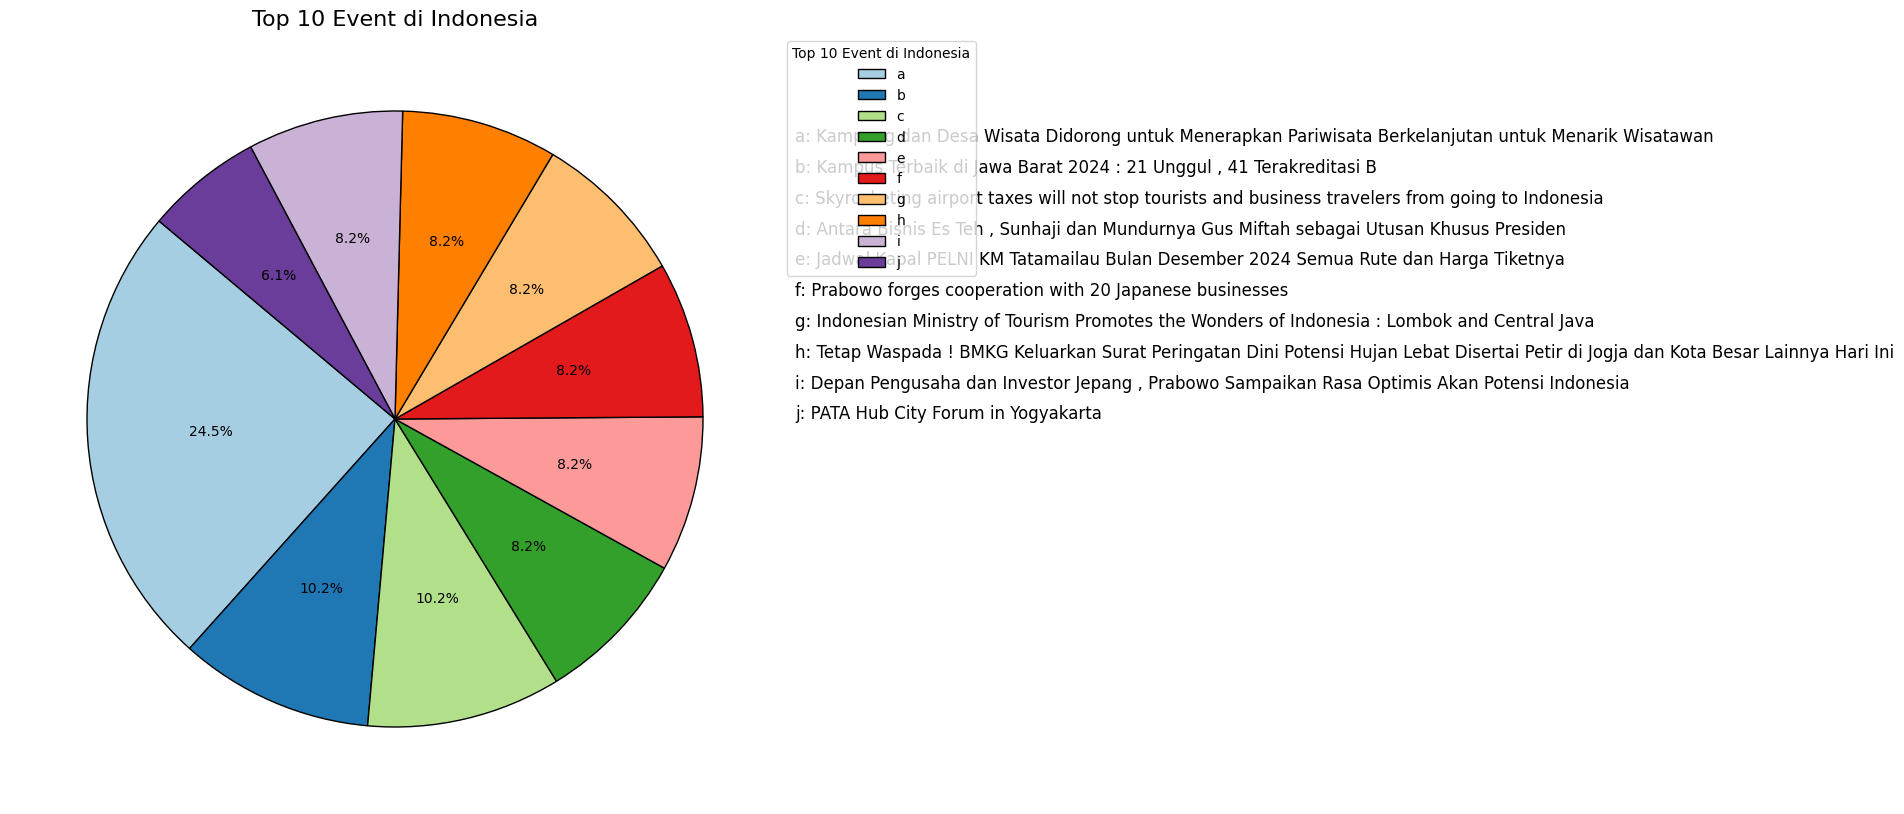

In [77]:
# Memfilter data hanya untuk Indonesia
filtered_df_indonesia = df[df['Location'].str.contains('Indonesia', na=False)]

# Mendapatkan Top 10 Event di Indonesia berdasarkan jumlah
top_10_indonesia_events = filtered_df_indonesia['Title'].value_counts().head(10)

# Visualisasi dalam bentuk diagram pie
plt.figure(figsize=(10, 10))  # Membuat gambar lebih besar
ax = top_10_indonesia_events.plot(kind='pie', autopct='%1.1f%%',
                                   colors=plt.cm.Paired.colors, startangle=140,
                                   wedgeprops={'edgecolor': 'black'}, labels=None)

# Memberikan label huruf (a, b, c, ...) pada setiap pie
labels = [f'{chr(97 + i)}' for i in range(len(top_10_indonesia_events))]
ax.legend(labels=labels, title="Top 10 Event di Indonesia", bbox_to_anchor=(1, 1))

# Menambahkan keterangan di bawah dengan judul masing-masing event
for i, event in enumerate(top_10_indonesia_events.index):
    plt.text(1.3, 0.9 - 0.1*i, f"{chr(97 + i)}: {event}", fontsize=12)

# Menampilkan grafik
plt.title('Top 10 Event di Indonesia', fontsize=16)
plt.ylabel('')  # Menghilangkan label y agar lebih bersih
plt.show()


In [72]:
# Menampilkan hasil top 10 event di Indonesia
print("Top 10 Event di Indonesia:")
display(top_10_indonesia_events)


Top 10 Event di Indonesia:


Title
Kampung dan Desa Wisata Didorong untuk Menerapkan Pariwisata Berkelanjutan untuk Menarik Wisatawan                                  12
Kampus Terbaik di Jawa Barat 2024 : 21 Unggul , 41 Terakreditasi B                                                                   5
Skyrocketing airport taxes will not stop tourists and business travelers from going to Indonesia                                     5
Antara Bisnis Es Teh , Sunhaji dan Mundurnya Gus Miftah sebagai Utusan Khusus Presiden                                               4
Jadwal Kapal PELNI KM Tatamailau Bulan Desember 2024 Semua Rute dan Harga Tiketnya                                                   4
Prabowo forges cooperation with 20 Japanese businesses                                                                               4
Indonesian Ministry of Tourism Promotes the Wonders of Indonesia : Lombok and Central Java                                           4
Tetap Waspada ! BMKG Keluarkan Surat Peringatan Dini Potensi Hujan Lebat Disertai Petir di Jogja dan Kota Besar Lainnya Hari Ini     4
Depan Pengusaha dan Investor Jepang , Prabowo Sampaikan Rasa Optimis Akan Potensi Indonesia                                          4
PATA Hub City Forum in Yogyakarta                                                                                                    3
Name: count, dtype: int64

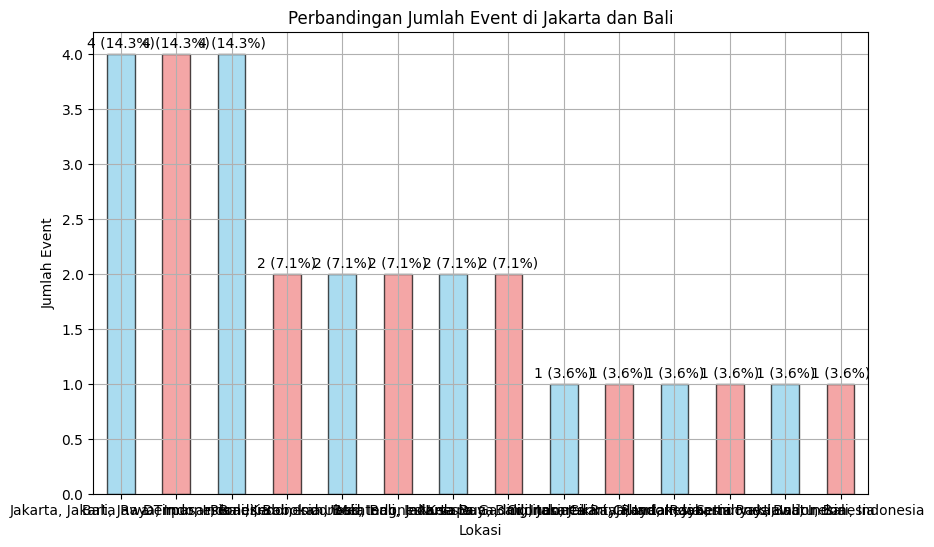

In [73]:
# Memfilter event yang terjadi di Jakarta dan Bali
jakarta_bali_df = filtered_df_indonesia[filtered_df_indonesia['Location'].str.contains('Jakarta|Bali', na=False)]

# Menghitung jumlah event per lokasi
location_counts_jakarta_bali = jakarta_bali_df['Location'].value_counts()

# Visualisasi dalam bentuk diagram batang
plt.figure(figsize=(10, 6))
ax = location_counts_jakarta_bali.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black', alpha=0.7)
plt.title('Perbandingan Jumlah Event di Jakarta dan Bali')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Event')
plt.xticks(rotation=0)
plt.grid(True)

# Menambahkan keterangan jumlah persen pada setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height/len(jakarta_bali_df)*100:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 8), textcoords='offset points')

plt.show()


In [74]:
# Menampilkan hasil jumlah event per lokasi
print("Jumlah Event di Jakarta dan Bali:")
display(location_counts_jakarta_bali)


Jumlah Event di Jakarta dan Bali:


Location
Jakarta, Jakarta Raya, Indonesia          4
Bali, Jawa Timur, Indonesia               4
Denpasar, Bali, Indonesia                 4
Peradi, Bali, Indonesia                   2
Kerobokan, Bali, Indonesia                2
Ubud, Bali, Indonesia                     2
Menteng, Jakarta Raya, Indonesia          2
Nusa Dua, Bali, Indonesia                 2
Kelapa Gading, Jakarta Raya, Indonesia    1
Cililitan, Jakarta Raya, Indonesia        1
Cikini, Jakarta Raya, Indonesia           1
Cilandak, Jakarta Raya, Indonesia         1
Seminyak, Bali, Indonesia                 1
Uluwatu, Bali, Indonesia                  1
Name: count, dtype: int64

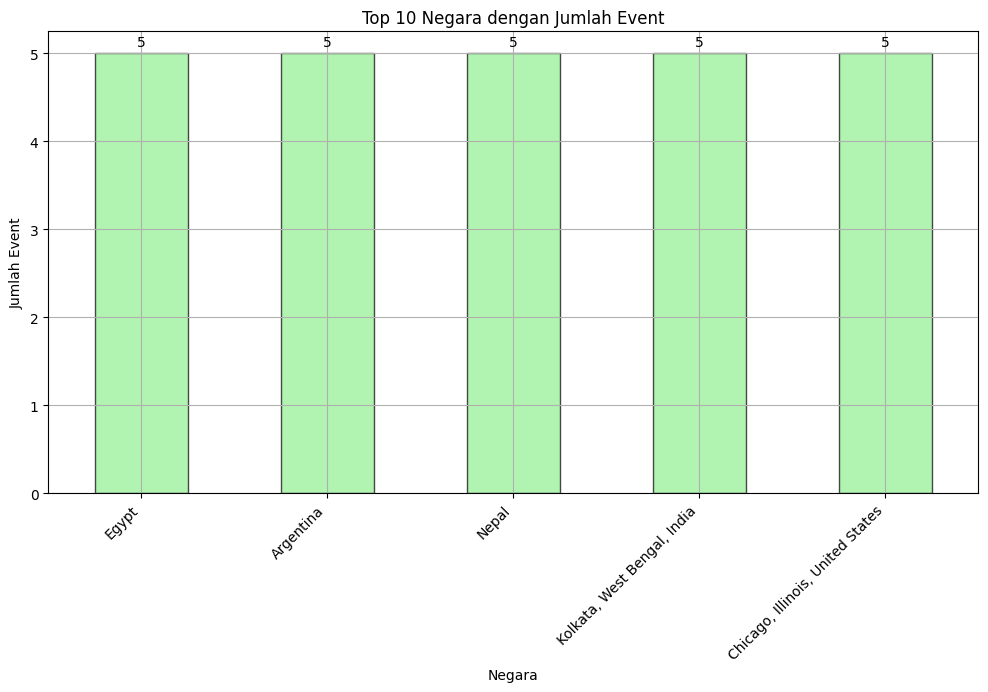

In [75]:
# Menghitung jumlah event per lokasi untuk semua negara
location_counts_all = df['Location'].value_counts().head(10)

# Memisahkan negara lain selain Indonesia
top_10_countries = location_counts_all[~location_counts_all.index.str.contains('Indonesia')]

# Visualisasi dalam bentuk diagram batang
plt.figure(figsize=(12, 6))
ax = top_10_countries.plot(kind='bar', color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Top 10 Negara dengan Jumlah Event')
plt.xlabel('Negara')
plt.ylabel('Jumlah Event')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Menambahkan keterangan jumlah event di bawah setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 8), textcoords='offset points')

plt.show()


In [76]:
# Menampilkan hasil top 10 negara
print("Top 10 Negara dengan Jumlah Event:")
display(top_10_countries)


Top 10 Negara dengan Jumlah Event:


Location
Egypt                               5
Argentina                           5
Nepal                               5
Kolkata, West Bengal, India         5
Chicago, Illinois, United States    5
Name: count, dtype: int64